In [1]:
import tushare as ts
import statsmodels.api as sm 
from pandas.tseries.offsets import Day
pro = ts.pro_api('37bcbf2d21af5170e8b8840d307991a4460bfbc3019fc21deafd0f12')
import pandas as pd
import numpy as np
import numpy as np
import time
import datetime
equities=[]
Alpha=[]
Beta=[]
j=1
CAPM=[]
a=pd.DataFrame()
b=pd.DataFrame()
result=pd.DataFrame()

In [2]:
def CAPM_CAL(frame):
    for i in range(frame.shape[0]):
        time.sleep(0.6)
        df_individual=ts.pro_bar(ts_code=frame["交易买方"][i], adj='qfq', start_date=str(frame["首次披露日"][i]-365*Day()),end_date=str(frame["首次披露日"][i]))

        df_individual

        df_individual["对数收益率"]=np.log(df_individual["close"]/df_individual["close"].shift(-1))

        df_individual=df_individual.dropna()

        df_index=ts.pro_bar(ts_code='399001.SZ', asset='I', start_date=str(frame["首次披露日"][i]-365*Day()),end_date=str(frame["首次披露日"][i]))

        df_index["对数收益率"]=np.log(df_index["close"]/df_index["close"].shift(-1))

        df_index=df_index.dropna()
        temp=pd.merge(df_index,df_individual,on="trade_date")
        x=temp["对数收益率_x"]
        y=temp["对数收益率_y"]

        #print(df_index)

        #print(df_individual)
       
        x = sm.add_constant(x)

        model = sm.OLS(y,x,hasconst=True)

        results = model.fit()

        results.params


        results.summary()

        
        equities.append(df_individual["ts_code"][0])



        Alpha.append(results.params[0])
        Beta.append(results.params[1])

    CAPM=pd.DataFrame(data=np.transpose([Alpha,Beta]),index=equities,columns=["Alpha","Beta"])
    return CAPM


In [3]:
frame = pd.read_excel('C:\\Users\\hasee\\Desktop\\a.xlsx', 'Sheet1')

In [4]:
CAPM = pd.read_excel('C:\\Users\\hasee\\Desktop\\CAPM.xlsx', 'Sheet1')

In [5]:
CAPM=CAPM_CAL(frame)

C:\Users\hasee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
CAPM

,Alpha,Beta
002803.SZ,0.002028,1.271113
300480.SZ,0.000250,1.178606
000409.SZ,-0.001911,0.494920
002254.SZ,0.000085,0.824741
002451.SZ,-0.002273,0.903008
...,...,...
300535.SZ,-0.001366,1.050725
002072.SZ,-0.001304,0.767501
000766.SZ,-0.002482,1.315982
300603.SZ,-0.001126,1.216854


In [7]:
def event_study(frame,capm,days):
    for i in range(frame.shape[0]):
        print(i)
        print(frame["交易买方"][i])
        time.sleep(0.25)
        df_individual_before_t=ts.pro_bar(ts_code=frame["交易买方"][i],adj='qfq', start_date=str(frame["首次披露日"][i].date()-days*Day()),end_date=str(frame["首次披露日"][i].date()))
        df_individual_After_t=ts.pro_bar(ts_code=frame["交易买方"][i], adj='qfq', start_date=str(frame["首次披露日"][i].date()),end_date=str(frame["首次披露日"][i].date()+days*Day()))
    

        for j in range(1,50): 
            if df_individual_before_t is None:
                df_individual_before_t=ts.pro_bar(ts_code=frame["交易买方"][i], adj='qfq', start_date=str(frame["首次披露日"][i].date()-(j+days)*Day()),end_date=str(frame["首次披露日"][i].date()))
            elif df_individual_before_t.shape[0]==days+1:
                print("ok")
                #print(df_individual_before_t)
                
                break
            else:
                df_individual_before_t=ts.pro_bar(ts_code=frame["交易买方"][i], adj='qfq', start_date=str(frame["首次披露日"][i].date()-(j+days)*Day()),end_date=str(frame["首次披露日"][i].date()))
        
        
        for n in range(1,50):
            if df_individual_After_t is None:
                df_individual_After_t=ts.pro_bar(ts_code=frame["交易买方"][i], adj='qfq', start_date=str(frame["首次披露日"][i].date()),end_date=str(frame["首次披露日"][i].date()+(days+n)*Day()))
            elif df_individual_After_t.shape[0]==days+1:        
                print("ok")
                #print(df_individual_After_t)
                break
            else:
                    #time.sleep(1.5)
                df_individual_After_t=ts.pro_bar(ts_code=frame["交易买方"][i], adj='qfq', start_date=str(frame["首次披露日"][i].date()),end_date=str(frame["首次披露日"][i].date()+(days+n)*Day()))
                    #print(str(frame["首次披露日"][i]+(5+j)*Day()))
                    #print(df_individual)
        #print(df_individual)
        df_individual=pd.concat([df_individual_before_t,df_individual_After_t])
        #print(df_individual)
        df_index=ts.pro_bar(ts_code='399001.SZ', asset='I', start_date=str(frame["首次披露日"][i].date()-30*Day()),end_date=str(frame["首次披露日"][i].date()+30*Day()))

        #for j in range(20):  
                #if df_index.shape[0]==7:        
                    #print("ok")
                    #print(df_index)
                    #break
                #else:
                    #df_index=ts.pro_bar(ts_code='399001.SZ', asset='I', start_date=str(frame["首次披露日"][i].date()),end_date=str(frame["首次披露日"][i].date()+(5+j)*Day()))
        
        df_individual["对数收益率"]=np.log(df_individual["close"]/df_individual["close"].shift(-1))

        df_individual=df_individual.dropna()

        df_index["对数收益率"]=np.log(df_index["close"]/df_index["close"].shift(-1))

        df_index=df_index.dropna()
        global a
        global b
        a=df_individual
        b=df_index
        #print(df_index)
        temp=pd.merge(df_individual,df_index,on="trade_date",how='left')
        temp.sort_values(by="trade_date",inplace=True)
        temp=temp.reindex(index=range(temp.shape[0]))
        print(temp)
        #print(temp.dtypes)
        event_study=pd.merge(temp["对数收益率_x"],temp["对数收益率_y"],right_index=True,left_index=True)
        print(event_study)
        #print(event_study.dtypes)
    
        event_study["AR"]=event_study["对数收益率_x"]-(event_study["对数收益率_y"]*CAPM["Beta"][frame["交易买方"][i]]+CAPM["Alpha"][frame["交易买方"][i]])

        event_study["CAR"]=np.cumsum(event_study["AR"])
        #print(event_study)
        result[frame["交易买方"][i]]=event_study["CAR"]
        print(result)
    return result

In [8]:
event_study(frame,CAPM,5)

0
002803.SZ
ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002803.SZ   20200619   26.40   26.71  26.02    26.20        26.30   
1   002803.SZ   20200618   26.43   27.11  26.16    26.30        26.48   
2   002803.SZ   20200617   27.60   27.95  26.20    26.48        27.96   
3   002803.SZ   20200616   28.50   28.52  27.21    27.96        27.69   
4   002803.SZ   20200615   28.36   29.21  27.45    27.69        28.63   
5   002803.SZ   20200612   26.81   28.80  26.11    28.63        27.43   
6   002803.SZ   20200630   25.20   25.35  24.73    24.94        24.97   
7   002803.SZ   20200629   26.50   26.52  24.60    24.97        26.59   
8   002803.SZ   20200624   25.66   26.74  25.28    26.59        25.73   
9   002803.SZ   20200623   26.49   26.50  25.63    25.73        26.54   
10  002803.SZ   20200622   26.21   26.79  26.04    26.54        26.20   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.10    -0.3802   

ok
   ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0  002254.SZ   20200618   12.60   13.16  12.35    13.03        12.42   
1  002254.SZ   20200617   12.48   12.58  12.23    12.42        12.46   
2  002254.SZ   20200616   12.50   12.72  12.42    12.46        12.49   
3  002254.SZ   20200615   12.41   12.56  12.41    12.49        12.41   
4  002254.SZ   20200612   12.30   12.55  12.26    12.41        12.47   
5  002254.SZ   20200611   12.46   12.58  12.32    12.47        12.45   
6  002254.SZ   20200624   13.85   13.86  13.55    13.60        13.87   
7  002254.SZ   20200623   13.69   13.95  13.51    13.87        13.63   
8  002254.SZ   20200622   12.90   13.86  12.90    13.63        12.91   
9  002254.SZ   20200619   13.05   13.15  12.80    12.91        13.03   

   change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      0.61     4.9114  116270.05  ...  11494.5542  11416.0779  11503.3827   
1     -0.04    -0.3210   62803.52  ...  11420.83

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300781.SZ   20200616   34.31   34.31  34.01    34.31        31.19   
1   300781.SZ   20200615   30.67   31.98  30.67    31.19        30.91   
2   300781.SZ   20200612   29.35   31.60  29.19    30.91        30.01   
3   300781.SZ   20200611   30.55   31.26  29.93    30.01        31.00   
4   300781.SZ   20200610   31.03   31.87  30.65    31.00        31.34   
5   300781.SZ   20200609   30.23   33.00  29.81    31.34        30.23   
6   300781.SZ   20200623   29.77   30.53  29.73    30.31        29.61   
7   300781.SZ   20200622   29.92   30.16  29.38    29.61        30.16   
8   300781.SZ   20200619   30.56   30.59  29.80    30.16        30.83   
9   300781.SZ   20200618   30.76   32.16  30.38    30.83        32.40   
10  300781.SZ   20200617   35.00   35.80  31.60    32.40        34.31   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       3.12    10.0032   30984.91  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300656.SZ   20200616   21.00   21.60  20.58    21.60        19.64   
1   300656.SZ   20200615   19.64   19.97  19.54    19.64        19.75   
2   300656.SZ   20200612   19.53   19.79  19.41    19.75        19.90   
3   300656.SZ   20200611   19.81   20.39  19.71    19.90        19.83   
4   300656.SZ   20200610   20.12   20.33  19.65    19.83        20.24   
5   300656.SZ   20200609   20.65   20.86  20.11    20.24        20.47   
6   300656.SZ   20200623   22.00   22.13  21.46    21.81        22.17   
7   300656.SZ   20200622   21.23   22.35  21.16    22.17        21.12   
8   300656.SZ   20200619   21.12   21.65  20.86    21.12        21.14   
9   300656.SZ   20200618   21.63   21.99  21.14    21.14        21.76   
10  300656.SZ   20200617   22.80   23.50  21.60    21.76        21.60   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       1.96     9.9796  16753.56  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000950.SZ   20200612    4.96    4.99   4.91     4.95         4.99   
1   000950.SZ   20200611    5.03    5.05   4.98     4.99         5.02   
2   000950.SZ   20200610    5.03    5.03   5.00     5.02         5.04   
3   000950.SZ   20200609    5.03    5.05   5.01     5.04         5.04   
4   000950.SZ   20200608    5.05    5.07   5.00     5.04         5.02   
5   000950.SZ   20200605    5.04    5.05   4.99     5.02         5.01   
6   000950.SZ   20200622    5.10    5.12   5.07     5.09         5.10   
7   000950.SZ   20200619    5.12    5.14   5.07     5.10         5.12   
8   000950.SZ   20200618    5.18    5.18   5.08     5.12         5.19   
9   000950.SZ   20200617    5.07    5.23   5.06     5.19         5.07   
10  000950.SZ   20200616    5.07    5.15   5.02     5.07         5.10   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.04    -0.8016   45938.04  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000959.SZ   20200612    3.64    4.09   3.64     4.09         3.72   
1   000959.SZ   20200611    3.70    3.82   3.54     3.72         3.66   
2   000959.SZ   20200610    3.45    3.71   3.35     3.66         3.37   
3   000959.SZ   20200609    3.39    3.42   3.30     3.37         3.38   
4   000959.SZ   20200608    3.09    3.38   3.07     3.38         3.07   
5   000959.SZ   20200605    3.07    3.08   3.05     3.07         3.06   
6   000959.SZ   20200622    4.52    4.60   4.37     4.49         4.52   
7   000959.SZ   20200619    4.69    4.70   4.38     4.52         4.87   
8   000959.SZ   20200618    5.00    5.47   4.78     4.87         4.99   
9   000959.SZ   20200617    5.10    5.23   4.81     4.99         4.75   
10  000959.SZ   20200616    4.32    4.75   4.15     4.75         4.32   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0       0.37     9.9462   521652.87  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002509.SZ   20200611    0.37    0.37   0.37     0.37         0.41   
1   002509.SZ   20200610    0.41    0.41   0.41     0.41         0.45   
2   002509.SZ   20200609    0.45    0.45   0.45     0.45         0.50   
3   002509.SZ   20200608    0.50    0.50   0.50     0.50         0.56   
4   002509.SZ   20200605    0.56    0.56   0.56     0.56         0.62   
5   002509.SZ   20200604    0.62    0.62   0.62     0.62         0.69   
6   002509.SZ   20200618    0.22    0.22   0.22     0.22         0.24   
7   002509.SZ   20200617    0.24    0.24   0.24     0.24         0.27   
8   002509.SZ   20200616    0.27    0.27   0.27     0.27         0.30   
9   002509.SZ   20200615    0.30    0.30   0.30     0.30         0.33   
10  002509.SZ   20200612    0.33    0.33   0.33     0.33         0.37   

    change_x  pct_chg_x   vol_x  ...     close_y      open_y      high_y  \
0      -0.04    -9.7561   449.0  ...  112

ok
ok
    ts_code_x trade_date   open_x   high_x    low_x  close_x  pre_close_x  \
0   300394.SZ   20200610  47.1300  50.8800  46.3300  47.8800      47.2000   
1   300394.SZ   20200609  47.3600  47.6900  46.6800  47.2000      47.5100   
2   300394.SZ   20200608  47.6800  48.5500  47.3100  47.5100      46.9800   
3   300394.SZ   20200605  47.5336  47.6228  46.1253  46.9881      47.4542   
4   300394.SZ   20200604  46.3237  48.4063  46.3237  47.4542      46.6609   
5   300394.SZ   20200603  47.7121  47.8509  46.2939  46.6609      47.5931   
6   300394.SZ   20200617  52.6400  52.6500  50.1000  52.4900      52.3000   
7   300394.SZ   20200616  49.0200  52.3000  49.0200  52.3000      48.3700   
8   300394.SZ   20200615  48.3800  50.3000  48.1200  48.3700      48.3200   
9   300394.SZ   20200612  47.0000  48.3800  46.4000  48.3200      47.7600   
10  300394.SZ   20200611  47.8200  48.4900  47.1300  47.7600      47.8800   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      h

ok
ok
    ts_code_x trade_date   open_x   high_x    low_x  close_x  pre_close_x  \
0   300550.SZ   20200610  29.9300  31.5000  29.0000  29.2600      29.9300   
1   300550.SZ   20200609  28.0000  29.9300  27.5700  29.9300      27.2100   
2   300550.SZ   20200608  26.8400  27.5100  26.7200  27.2100      26.6800   
3   300550.SZ   20200605  26.9600  26.9600  26.5000  26.6800      26.6400   
4   300550.SZ   20200604  26.3000  26.8000  26.1600  26.6400      26.2900   
5   300550.SZ   20200603  26.5200  27.0100  26.2400  26.2900      26.4700   
6   300550.SZ   20200617  20.4500  20.8800  20.3000  20.4200      20.2800   
7   300550.SZ   20200616  20.4392  20.5889  20.1754  20.2752      20.3465   
8   300550.SZ   20200615  20.1754  20.8028  20.1754  20.3465      20.0756   
9   300550.SZ   20200612  19.9900  20.4534  19.9900  20.0756      20.3750   
10  300550.SZ   20200611  21.0950  21.0950  20.2538  20.3750      20.8598   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      h

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002946.SZ   20200610   17.64   18.20  17.00    18.08        17.78   
1   002946.SZ   20200609   17.36   18.36  17.09    17.78        17.23   
2   002946.SZ   20200608   17.51   17.62  16.83    17.23        17.38   
3   002946.SZ   20200605   17.30   17.74  17.05    17.38        17.65   
4   002946.SZ   20200604   17.58   17.95  17.31    17.65        17.50   
5   002946.SZ   20200603   17.75   17.75  17.24    17.50        17.73   
6   002946.SZ   20200617   18.30   18.46  17.60    18.31        18.24   
7   002946.SZ   20200616   17.71   18.49  17.71    18.24        17.80   
8   002946.SZ   20200615   17.30   18.58  16.58    17.80        17.29   
9   002946.SZ   20200612   16.70   17.50  16.59    17.29        17.32   
10  002946.SZ   20200611   17.90   17.91  17.18    17.32        18.08   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.30     1.6873  117413.64  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000155.SZ   20200608    4.11    4.11   4.11     4.11         3.74   
1   000155.SZ   20200522    3.79    3.79   3.68     3.74         3.76   
2   000155.SZ   20200521    3.81    3.84   3.74     3.76         3.82   
3   000155.SZ   20200520    3.87    3.90   3.80     3.82         3.87   
4   000155.SZ   20200519    3.88    3.90   3.85     3.87         3.84   
5   000155.SZ   20200518    3.83    3.86   3.78     3.84         3.79   
6   000155.SZ   20200615    4.09    4.30   4.03     4.24         4.09   
7   000155.SZ   20200612    4.10    4.14   4.05     4.09         4.18   
8   000155.SZ   20200611    3.94    4.28   3.94     4.18         4.01   
9   000155.SZ   20200610    4.01    4.08   3.94     4.01         4.24   
10  000155.SZ   20200609    4.52    4.52   4.19     4.24         4.11   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.37     9.8930    8781.85  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000546.SZ   20200605   10.98   11.33  10.96    11.15        11.06   
1   000546.SZ   20200604   11.01   11.15  10.65    11.06        10.60   
2   000546.SZ   20200603   10.57   11.01  10.54    10.60        10.63   
3   000546.SZ   20200602    9.90   10.76   9.85    10.63         9.98   
4   000546.SZ   20200601    9.82   10.10   9.78     9.98         9.83   
5   000546.SZ   20200529    9.77   10.00   9.65     9.83         9.88   
6   000546.SZ   20200615   10.75   10.85  10.40    10.46        10.75   
7   000546.SZ   20200612   10.62   11.00  10.62    10.75        10.83   
8   000546.SZ   20200611   10.84   11.13  10.69    10.83        10.77   
9   000546.SZ   20200610   10.83   10.95  10.72    10.77        10.79   
10  000546.SZ   20200609   11.16   11.20  10.76    10.79        11.16   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.09     0.8137  147083.12  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300220.SZ   20200605   62.00   62.05  52.22    53.00        58.02   
1   300220.SZ   20200604   57.50   58.17  57.00    58.02        57.27   
2   300220.SZ   20200603   56.85   57.58  56.72    57.27        56.52   
3   300220.SZ   20200602   56.94   57.00  55.81    56.52        56.51   
4   300220.SZ   20200601   55.48   57.64  55.27    56.51        55.47   
5   300220.SZ   20200529   56.00   56.78  54.50    55.47        55.82   
6   300220.SZ   20200612   50.65   52.11  50.20    52.00        51.19   
7   300220.SZ   20200611   53.10   53.76  50.80    51.19        53.50   
8   300220.SZ   20200610   57.00   57.00  52.41    53.50        54.20   
9   300220.SZ   20200609   54.45   54.89  53.76    54.20        54.32   
10  300220.SZ   20200608   52.95   55.00  51.69    54.32        53.00   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -5.02    -8.6522  63791.58  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x   low_x  close_x  pre_close_x  \
0   300225.SZ   20200603  6.4000  7.0400  6.3600   6.5700       6.4000   
1   300225.SZ   20200602  6.2300  6.4300  6.1300   6.4000       6.2000   
2   300225.SZ   20200601  6.1700  6.2300  6.0900   6.2000       6.0900   
3   300225.SZ   20200529  6.1000  6.1200  6.0500   6.0900       6.1200   
4   300225.SZ   20200528  6.0900  6.1800  6.0200   6.1200       6.1500   
5   300225.SZ   20200527  6.1100  6.3000  6.0100   6.1500       6.2000   
6   300225.SZ   20200610  6.6500  7.2900  6.5000   7.0600       6.6400   
7   300225.SZ   20200609  6.5200  6.7200  6.3700   6.6400       6.6700   
8   300225.SZ   20200608  6.5000  7.1900  6.5000   6.6700       6.5400   
9   300225.SZ   20200605  6.2205  6.7597  6.0707   6.5400       6.2305   
10  300225.SZ   20200604  6.4402  6.4402  6.0707   6.2305       6.5600   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0     0.1700     2.6562  4

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002478.SZ   20200602    4.92    4.92   4.87     4.91         4.92   
1   002478.SZ   20200601    4.84    4.93   4.83     4.92         4.82   
2   002478.SZ   20200529    4.83    4.84   4.80     4.82         4.84   
3   002478.SZ   20200528    4.81    4.86   4.79     4.84         4.81   
4   002478.SZ   20200527    4.79    4.84   4.78     4.81         4.79   
5   002478.SZ   20200526    4.75    4.81   4.74     4.79         4.73   
6   002478.SZ   20200609    4.85    4.89   4.81     4.88         4.85   
7   002478.SZ   20200608    4.87    4.88   4.84     4.85         4.86   
8   002478.SZ   20200605    4.87    4.90   4.83     4.86         4.87   
9   002478.SZ   20200604    4.90    4.92   4.83     4.87         4.89   
10  002478.SZ   20200603    4.92    4.95   4.89     4.89         4.91   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.01    -0.2033  39529.70  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000881.SZ   20200602    7.31    7.56   7.23     7.33         7.23   
1   000881.SZ   20200601    7.16    7.26   7.12     7.23         7.15   
2   000881.SZ   20200529    7.22    7.30   7.11     7.15         7.25   
3   000881.SZ   20200528    7.19    7.39   7.19     7.25         7.21   
4   000881.SZ   20200527    7.24    7.30   7.14     7.21         7.30   
5   000881.SZ   20200526    7.26    7.36   7.21     7.30         7.27   
6   000881.SZ   20200609    7.35    7.40   7.22     7.28         7.39   
7   000881.SZ   20200608    7.34    7.46   7.26     7.39         7.26   
8   000881.SZ   20200605    7.24    7.26   7.12     7.26         7.23   
9   000881.SZ   20200604    7.30    7.36   7.18     7.23         7.32   
10  000881.SZ   20200603    7.32    7.40   7.26     7.32         7.33   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.10     1.3831  78603.15  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x   low_x  close_x  pre_close_x  \
0   300017.SZ   20200601  7.9600  8.1700  7.8800   8.1100       7.7600   
1   300017.SZ   20200529  7.6904  7.8199  7.6506   7.7601       7.7303   
2   300017.SZ   20200528  7.7502  7.8398  7.5510   7.7303       7.7502   
3   300017.SZ   20200527  7.8697  7.9295  7.7203   7.7502       7.9295   
4   300017.SZ   20200526  7.7701  7.9295  7.7502   7.9295       7.7502   
5   300017.SZ   20200525  7.7402  7.8299  7.6904   7.7502       7.7303   
6   300017.SZ   20200608  7.9900  8.0500  7.8100   7.8300       7.9500   
7   300017.SZ   20200605  7.9200  7.9700  7.8600   7.9500       7.9400   
8   300017.SZ   20200604  8.1000  8.1300  7.8100   7.9400       8.1100   
9   300017.SZ   20200603  8.2800  8.3100  8.0900   8.1100       8.3000   
10  300017.SZ   20200602  8.1100  8.3100  8.0400   8.3000       8.1100   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0     0.3500     4.5103  6

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300368.SZ   20200529    8.23    8.39   8.07     8.13         8.31   
1   300368.SZ   20200528    8.48    8.50   7.99     8.31         8.40   
2   300368.SZ   20200527    8.56    8.69   8.31     8.40         8.63   
3   300368.SZ   20200526    8.45    8.70   8.38     8.63         8.48   
4   300368.SZ   20200525    8.64    8.87   8.35     8.48         8.74   
5   300368.SZ   20200522    9.21    9.27   8.70     8.74         9.34   
6   300368.SZ   20200608    8.32    8.37   8.13     8.13         8.31   
7   300368.SZ   20200605    8.22    8.33   8.13     8.31         8.21   
8   300368.SZ   20200604    8.39    8.45   8.17     8.21         8.43   
9   300368.SZ   20200603    8.52    8.65   8.32     8.43         8.48   
10  300368.SZ   20200602    8.50    8.68   8.38     8.48         8.45   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.18    -2.1661  194271.01  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002361.SZ   20200529    4.68    5.11   4.63     4.81         4.65   
1   002361.SZ   20200528    4.68    4.69   4.54     4.65         4.71   
2   002361.SZ   20200527    4.58    4.76   4.50     4.71         4.60   
3   002361.SZ   20200526    4.58    4.71   4.54     4.60         4.58   
4   002361.SZ   20200525    4.55    4.58   4.43     4.58         4.54   
5   002361.SZ   20200522    4.42    4.57   4.38     4.54         4.45   
6   002361.SZ   20200605    4.86    4.92   4.67     4.77         4.86   
7   002361.SZ   20200604    4.90    5.07   4.81     4.86         4.89   
8   002361.SZ   20200603    5.02    5.05   4.87     4.89         5.05   
9   002361.SZ   20200602    4.78    5.20   4.75     5.05         4.82   
10  002361.SZ   20200601    4.81    4.90   4.70     4.82         4.81   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.16     3.4409  379560.00  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300506.SZ   20200528    5.15    5.19   5.04     5.09         5.13   
1   300506.SZ   20200527    5.17    5.18   5.01     5.13         5.13   
2   300506.SZ   20200526    5.02    5.15   5.00     5.13         5.06   
3   300506.SZ   20200525    5.01    5.07   4.95     5.06         5.01   
4   300506.SZ   20200522    5.09    5.09   4.94     5.01         5.10   
5   300506.SZ   20200521    5.24    5.27   5.06     5.10         5.23   
6   300506.SZ   20200604    5.59    5.77   5.48     5.72         5.63   
7   300506.SZ   20200603    5.46    5.78   5.32     5.63         5.55   
8   300506.SZ   20200602    5.33    5.82   5.29     5.55         5.29   
9   300506.SZ   20200601    5.08    5.35   5.08     5.29         5.08   
10  300506.SZ   20200529    5.08    5.13   5.05     5.08         5.09   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.04    -0.7797   34321.22  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000587.SZ   20200526    0.70    0.70   0.70     0.70         0.67   
1   000587.SZ   20200525    0.67    0.67   0.67     0.67         0.70   
2   000587.SZ   20200522    0.70    0.70   0.70     0.70         0.74   
3   000587.SZ   20200521    0.74    0.76   0.74     0.74         0.78   
4   000587.SZ   20200520    0.78    0.82   0.78     0.78         0.82   
5   000587.SZ   20200519    0.83    0.85   0.82     0.82         0.86   
6   000587.SZ   20200602    0.89    0.90   0.87     0.90         0.86   
7   000587.SZ   20200601    0.84    0.86   0.80     0.86         0.82   
8   000587.SZ   20200529    0.82    0.82   0.82     0.82         0.78   
9   000587.SZ   20200528    0.76    0.78   0.74     0.78         0.74   
10  000587.SZ   20200527    0.74    0.74   0.67     0.74         0.70   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.03     4.4776  262818.37  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300612.SZ   20200526   14.20   14.32  13.85    13.97        14.18   
1   300612.SZ   20200525   13.64   15.05  13.64    14.18        13.68   
2   300612.SZ   20200522   13.51   14.02  13.41    13.68        13.63   
3   300612.SZ   20200521   13.84   14.10  13.49    13.63        13.84   
4   300612.SZ   20200520   13.75   14.06  13.63    13.84        13.90   
5   300612.SZ   20200519   13.55   13.92  13.43    13.90        13.44   
6   300612.SZ   20200602   14.99   15.38  14.75    14.77        14.90   
7   300612.SZ   20200601   14.66   15.40  14.46    14.90        14.50   
8   300612.SZ   20200529   13.65   14.69  13.65    14.50        13.78   
9   300612.SZ   20200528   13.64   13.93  13.45    13.78        13.77   
10  300612.SZ   20200527   14.00   14.15  13.51    13.77        13.97   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.21    -1.4810  35542.75  ... 

ok
ok
    ts_code_x trade_date   open_x   high_x    low_x  close_x  pre_close_x  \
0   002409.SZ   20200526  48.0000  49.7400  47.5000  49.5600      48.7000   
1   002409.SZ   20200525  49.4800  51.5000  48.0500  48.7000      50.3000   
2   002409.SZ   20200522  48.0000  51.7700  46.7000  50.3000      47.5000   
3   002409.SZ   20200521  49.0000  51.5000  46.7500  47.5000      49.0300   
4   002409.SZ   20200520  47.6000  50.5500  46.8200  49.0300      46.2100   
5   002409.SZ   20200519  42.5600  46.2100  41.8800  46.2100      42.0100   
6   002409.SZ   20200602  49.2300  52.2500  48.6100  49.9000      49.1800   
7   002409.SZ   20200601  48.6600  50.1300  46.7500  49.1800      47.7500   
8   002409.SZ   20200529  44.0000  47.7500  44.0000  47.7500      43.4100   
9   002409.SZ   20200528  47.0000  47.2500  43.3600  43.4100      48.1800   
10  002409.SZ   20200527  48.4384  50.5757  47.3298  48.1787      49.4971   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002822.SZ   20200525   10.10   10.20   9.43     9.43        10.48   
1   002822.SZ   20200522   10.51   10.78  10.28    10.48        10.53   
2   002822.SZ   20200521   10.08   10.70   9.89    10.53        10.24   
3   002822.SZ   20200520   10.01   10.33   9.70    10.24        10.07   
4   002822.SZ   20200519    9.67   10.16   9.65    10.07         9.55   
5   002822.SZ   20200518    9.84    9.87   9.49     9.55         9.88   
6   002822.SZ   20200601    9.35    9.50   9.17     9.41         9.32   
7   002822.SZ   20200529    9.10    9.36   8.89     9.32         9.03   
8   002822.SZ   20200528    9.17    9.21   8.82     9.03         9.17   
9   002822.SZ   20200527    9.26    9.37   8.90     9.17         9.27   
10  002822.SZ   20200526    9.04    9.58   9.04     9.27         9.43   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -1.05   -10.0191  287665.66  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000935.SZ   20200522   14.10   14.10  13.47    13.48        14.10   
1   000935.SZ   20200521   14.13   14.33  13.95    14.10        14.16   
2   000935.SZ   20200520   14.15   14.33  13.82    14.16        14.12   
3   000935.SZ   20200519   14.09   14.46  14.01    14.12        13.95   
4   000935.SZ   20200518   14.45   14.48  13.91    13.95        13.69   
5   000935.SZ   20200515   13.78   13.82  13.58    13.69        13.68   
6   000935.SZ   20200601   12.98   13.22  12.92    13.18        12.85   
7   000935.SZ   20200529   12.90   13.00  12.76    12.85        12.92   
8   000935.SZ   20200528   13.03   13.17  12.77    12.92        13.01   
9   000935.SZ   20200527   13.10   13.14  12.97    13.01        13.15   
10  000935.SZ   20200526   13.08   13.16  13.05    13.15        13.07   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.62    -4.3972   84936.78  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300019.SZ   20200522   10.45   10.60  10.10    10.44        10.49   
1   300019.SZ   20200521   10.40   10.57  10.30    10.49        10.35   
2   300019.SZ   20200520    9.43   10.42   9.43    10.35         9.55   
3   300019.SZ   20200519    9.13    9.56   9.08     9.55         8.97   
4   300019.SZ   20200518    9.07    9.24   8.95     8.97         9.03   
5   300019.SZ   20200515    9.11    9.18   9.00     9.03         9.08   
6   300019.SZ   20200601    9.99   10.26   9.88    10.20         9.87   
7   300019.SZ   20200529    9.98    9.98   9.81     9.87         9.90   
8   300019.SZ   20200528   10.07   10.14   9.72     9.90        10.12   
9   300019.SZ   20200527   10.20   10.40   9.99    10.12        10.20   
10  300019.SZ   20200526   10.25   10.25  10.09    10.20        10.18   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.05    -0.4766   73426.90  ..

ok
ok
    ts_code_x trade_date   open_x   high_x    low_x  close_x  pre_close_x  \
0   300440.SZ   20200522  11.5600  11.5600  10.7000  10.7000      11.8900   
1   300440.SZ   20200515  11.2700  11.9000  10.9700  11.8900      11.1700   
2   300440.SZ   20200514  11.4100  11.5000  11.1300  11.1700      11.4600   
3   300440.SZ   20200513  11.4400  11.7900  11.4100  11.4600      11.5100   
4   300440.SZ   20200512  11.4700  11.6700  11.2300  11.5100      11.4700   
5   300440.SZ   20200511  11.8200  12.0700  11.2200  11.4700      11.9800   
6   300440.SZ   20200529   9.6100   9.7600   9.5200   9.6100       9.6900   
7   300440.SZ   20200528   9.9700   9.9700   9.5100   9.6900       9.8400   
8   300440.SZ   20200527  10.4665  10.4864   9.8403   9.8403      10.4268   
9   300440.SZ   20200526  10.3572  10.7051  10.3274  10.4268      10.3472   
10  300440.SZ   20200525  10.6355  10.9237   9.9397  10.3472      10.6355   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000876.SZ   20200520   29.28   29.28  28.59    28.81        29.70   
1   000876.SZ   20200519   30.86   30.92  29.39    29.70        30.83   
2   000876.SZ   20200518   30.40   31.19  30.26    30.83        30.15   
3   000876.SZ   20200515   30.31   30.42  29.86    30.15        30.10   
4   000876.SZ   20200514   30.71   30.80  29.98    30.10        30.85   
5   000876.SZ   20200513   30.56   31.02  30.52    30.85        30.66   
6   000876.SZ   20200527   28.27   28.58  27.80    27.98        28.26   
7   000876.SZ   20200526   28.51   28.67  27.79    28.26        28.42   
8   000876.SZ   20200525   28.50   29.60  28.34    28.42        28.21   
9   000876.SZ   20200522   28.50   28.90  28.00    28.21        28.28   
10  000876.SZ   20200521   29.01   29.10  28.13    28.28        28.81   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.89    -2.9966  516504.79  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000966.SZ   20200520    4.46    4.46   4.12     4.16         4.12   
1   000966.SZ   20200430    4.13    4.17   4.11     4.12         4.13   
2   000966.SZ   20200429    4.04    4.13   3.95     4.13         4.04   
3   000966.SZ   20200428    3.92    4.04   3.88     4.04         3.91   
4   000966.SZ   20200427    3.86    3.95   3.85     3.91         3.87   
5   000966.SZ   20200424    3.89    3.90   3.85     3.87         3.89   
6   000966.SZ   20200527    3.86    3.86   3.82     3.84         3.85   
7   000966.SZ   20200526    3.83    3.87   3.81     3.85         3.83   
8   000966.SZ   20200525    3.84    3.87   3.79     3.83         3.86   
9   000966.SZ   20200522    3.89    3.94   3.83     3.86         3.90   
10  000966.SZ   20200521    4.09    4.10   3.87     3.90         4.16   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.04     0.9709  297828.30  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002471.SZ   20200519    2.29    2.31   2.20     2.22         2.27   
1   002471.SZ   20200518    2.31    2.33   2.26     2.27         2.34   
2   002471.SZ   20200515    2.37    2.46   2.33     2.34         2.37   
3   002471.SZ   20200514    2.40    2.42   2.30     2.37         2.45   
4   002471.SZ   20200513    2.39    2.50   2.34     2.45         2.39   
5   002471.SZ   20200512    2.41    2.43   2.36     2.39         2.41   
6   002471.SZ   20200526    2.16    2.20   2.15     2.19         2.15   
7   002471.SZ   20200525    2.16    2.19   2.14     2.15         2.14   
8   002471.SZ   20200522    2.17    2.20   2.11     2.14         2.17   
9   002471.SZ   20200521    2.16    2.20   2.15     2.17         2.15   
10  002471.SZ   20200520    2.21    2.21   2.13     2.15         2.22   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.05    -2.2026  160555.53  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002483.SZ   20200519    4.72    4.76   4.64     4.73         4.68   
1   002483.SZ   20200518    4.73    4.76   4.66     4.68         4.76   
2   002483.SZ   20200515    4.87    4.91   4.73     4.76         4.85   
3   002483.SZ   20200514    4.94    4.98   4.85     4.85         5.00   
4   002483.SZ   20200513    4.76    5.14   4.75     5.00         4.69   
5   002483.SZ   20200512    4.69    4.72   4.56     4.69         4.70   
6   002483.SZ   20200526    4.51    4.57   4.50     4.54         4.51   
7   002483.SZ   20200525    4.51    4.58   4.50     4.51         4.52   
8   002483.SZ   20200522    4.59    4.61   4.51     4.52         4.59   
9   002483.SZ   20200521    4.65    4.66   4.58     4.59         4.63   
10  002483.SZ   20200520    4.72    4.72   4.62     4.63         4.73   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.05     1.0684   67608.59  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002180.SZ   20200518   31.67   31.88  29.88    29.90        31.36   
1   002180.SZ   20200515   30.93   31.90  30.68    31.36        30.77   
2   002180.SZ   20200514   30.60   31.13  30.38    30.77        30.60   
3   002180.SZ   20200513   30.53   30.91  30.32    30.60        30.82   
4   002180.SZ   20200512   31.20   31.20  29.92    30.82        31.34   
5   002180.SZ   20200511   32.30   32.31  30.91    31.34        31.89   
6   002180.SZ   20200525   28.75   28.76  27.26    27.48        28.81   
7   002180.SZ   20200522   29.56   29.84  28.56    28.81        29.56   
8   002180.SZ   20200521   30.95   30.99  29.53    29.56        30.80   
9   002180.SZ   20200520   30.48   31.75  30.24    30.80        30.43   
10  002180.SZ   20200519   30.31   30.47  29.70    30.43        29.90   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -1.46    -4.6556  254212.11  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000403.SZ   20200515   43.37   43.37  43.37    43.37        39.43   
1   000403.SZ   20200427   38.18   39.74  38.17    39.43        38.00   
2   000403.SZ   20200424   37.92   38.45  37.25    38.00        37.92   
3   000403.SZ   20200423   37.22   38.50  37.16    37.92        36.95   
4   000403.SZ   20200422   36.96   37.16  36.50    36.95        37.28   
5   000403.SZ   20200421   36.60   37.44  36.25    37.28        36.58   
6   000403.SZ   20200522   56.02   58.85  50.74    54.50        56.38   
7   000403.SZ   20200521   56.58   59.25  55.66    56.38        57.73   
8   000403.SZ   20200520   54.50   57.73  53.10    57.73        52.48   
9   000403.SZ   20200519   52.48   52.48  52.48    52.48        47.71   
10  000403.SZ   20200518   47.71   47.71  47.71    47.71        43.37   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       3.94     9.9924     847.55  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002864.SZ   20200512   26.32   26.77  26.31    26.54        26.42   
1   002864.SZ   20200511   26.74   26.94  26.26    26.42        26.72   
2   002864.SZ   20200508   26.54   26.85  26.54    26.72        26.54   
3   002864.SZ   20200507   26.43   26.76  26.26    26.54        26.54   
4   002864.SZ   20200506   25.90   26.69  25.80    26.54        26.29   
5   002864.SZ   20200430   26.00   26.56  25.72    26.29        25.85   
6   002864.SZ   20200519   26.22   26.49  26.12    26.45        26.17   
7   002864.SZ   20200518   26.14   26.35  25.88    26.17        26.21   
8   002864.SZ   20200515   26.50   26.69  26.15    26.21        26.47   
9   002864.SZ   20200514   26.72   26.74  26.45    26.47        26.80   
10  002864.SZ   20200513   26.50   26.80  26.11    26.80        26.54   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.12     0.4542  10356.44  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   001896.SZ   20200508    3.28    3.31   3.27     3.30         3.28   
1   001896.SZ   20200507    3.31    3.33   3.25     3.28         3.31   
2   001896.SZ   20200506    3.24    3.31   3.21     3.31         3.25   
3   001896.SZ   20200430    3.16    3.26   3.16     3.25         3.16   
4   001896.SZ   20200429    3.14    3.18   3.13     3.16         3.16   
5   001896.SZ   20200428    3.21    3.26   3.12     3.16         3.21   
6   001896.SZ   20200518    3.26    3.29   3.17     3.27         3.27   
7   001896.SZ   20200515    3.28    3.31   3.26     3.27         3.29   
8   001896.SZ   20200514    3.26    3.33   3.24     3.29         3.26   
9   001896.SZ   20200513    3.28    3.28   3.24     3.26         3.28   
10  001896.SZ   20200512    3.30    3.33   3.25     3.28         3.30   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.02     0.6098   69985.00  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000063.SZ   20200508   42.69   42.98  42.10    42.49        42.21   
1   000063.SZ   20200507   43.41   44.68  42.19    42.21        41.92   
2   000063.SZ   20200506   40.50   41.99  40.35    41.92        41.09   
3   000063.SZ   20200430   39.15   41.58  39.13    41.09        38.74   
4   000063.SZ   20200429   38.89   39.10  38.66    38.74        39.16   
5   000063.SZ   20200428   38.63   39.21  37.50    39.16        38.85   
6   000063.SZ   20200515   40.87   41.53  40.40    41.17        40.68   
7   000063.SZ   20200514   41.50   41.69  40.60    40.68        41.76   
8   000063.SZ   20200513   41.70   42.05  41.49    41.76        42.22   
9   000063.SZ   20200512   42.89   42.90  41.48    42.22        43.04   
10  000063.SZ   20200511   42.75   43.30  42.46    43.04        42.49   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0       0.28     0.6633   904653.83  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000420.SZ   20200508    2.23    2.26   2.22     2.23         2.22   
1   000420.SZ   20200507    2.24    2.27   2.21     2.22         2.24   
2   000420.SZ   20200506    2.19    2.24   2.17     2.24         2.21   
3   000420.SZ   20200430    2.17    2.23   2.17     2.21         2.17   
4   000420.SZ   20200429    2.17    2.21   2.15     2.17         2.16   
5   000420.SZ   20200428    2.26    2.28   2.12     2.16         2.27   
6   000420.SZ   20200515    2.14    2.16   2.13     2.14         2.13   
7   000420.SZ   20200514    2.17    2.17   2.13     2.13         2.19   
8   000420.SZ   20200513    2.15    2.21   2.12     2.19         2.17   
9   000420.SZ   20200512    2.20    2.20   2.14     2.17         2.20   
10  000420.SZ   20200511    2.23    2.25   2.17     2.20         2.23   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.01     0.4505  235344.02  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000818.SZ   20200506   23.90   25.18  23.90    25.00        23.43   
1   000818.SZ   20200430   21.41   23.43  21.41    23.43        21.30   
2   000818.SZ   20200429   20.48   21.68  20.24    21.30        20.66   
3   000818.SZ   20200428   20.85   21.20  19.43    20.66        21.02   
4   000818.SZ   20200427   21.70   21.77  20.85    21.02        21.76   
5   000818.SZ   20200424   22.90   23.06  21.65    21.76        22.91   
6   000818.SZ   20200513   26.13   26.83  26.00    26.45        26.15   
7   000818.SZ   20200512   25.90   26.32  25.29    26.15        26.00   
8   000818.SZ   20200511   26.67   26.80  25.67    26.00        26.41   
9   000818.SZ   20200508   24.55   26.41  24.03    26.41        24.01   
10  000818.SZ   20200507   25.00   25.09  23.88    24.01        25.00   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       1.57     6.7008  450025.38  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002599.SZ   20200506    3.92    4.04   3.90     4.00         3.96   
1   002599.SZ   20200430    3.95    3.99   3.91     3.96         3.93   
2   002599.SZ   20200429    3.88    4.06   3.85     3.93         3.82   
3   002599.SZ   20200428    3.98    3.98   3.73     3.82         3.96   
4   002599.SZ   20200427    4.02    4.04   3.96     3.96         3.99   
5   002599.SZ   20200424    4.14    4.15   3.98     3.99         4.10   
6   002599.SZ   20200513    4.00    4.09   3.97     4.06         4.00   
7   002599.SZ   20200512    3.91    4.00   3.89     4.00         3.92   
8   002599.SZ   20200511    4.00    4.00   3.90     3.92         3.98   
9   002599.SZ   20200508    4.00    4.01   3.95     3.98         3.95   
10  002599.SZ   20200507    4.00    4.05   3.94     3.95         4.00   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.04     1.0101  31484.96  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000719.SZ   20200430    6.77    6.86   6.77     6.84         6.70   
1   000719.SZ   20200429    6.75    6.76   6.64     6.70         6.79   
2   000719.SZ   20200428    6.93    7.02   6.70     6.79         6.96   
3   000719.SZ   20200427    6.67    7.32   6.63     6.96         6.67   
4   000719.SZ   20200424    6.76    6.81   6.64     6.67         6.76   
5   000719.SZ   20200423    6.70    6.82   6.69     6.76         6.72   
6   000719.SZ   20200512    6.80    6.82   6.74     6.79         6.82   
7   000719.SZ   20200511    6.86    6.91   6.78     6.82         6.85   
8   000719.SZ   20200508    6.84    6.88   6.80     6.85         6.82   
9   000719.SZ   20200507    6.89    6.89   6.79     6.82         6.90   
10  000719.SZ   20200506    6.81    6.95   6.76     6.90         6.84   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.14     2.0896   44589.12  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002411.SZ   20200430    7.54    7.77   7.54     7.72         7.56   
1   002411.SZ   20200429    7.55    7.70   7.53     7.56         7.58   
2   002411.SZ   20200428    7.87    8.06   7.48     7.58         7.93   
3   002411.SZ   20200427    8.07    8.13   7.89     7.93         8.15   
4   002411.SZ   20200424    8.51    8.56   8.10     8.15         8.63   
5   002411.SZ   20200423    8.65    8.92   8.58     8.63         8.55   
6   002411.SZ   20200512    8.00    8.17   7.92     8.04         7.97   
7   002411.SZ   20200511    7.97    8.08   7.91     7.97         7.93   
8   002411.SZ   20200508    8.00    8.05   7.88     7.93         7.99   
9   002411.SZ   20200507    7.95    8.43   7.90     7.99         7.81   
10  002411.SZ   20200506    7.62    7.83   7.58     7.81         7.72   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.16     2.1164  246671.67  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002521.SZ   20200430    5.61    5.63   5.51     5.59         5.60   
1   002521.SZ   20200429    5.49    5.64   5.45     5.60         5.49   
2   002521.SZ   20200428    5.54    5.56   5.22     5.49         5.54   
3   002521.SZ   20200427    5.53    5.59   5.47     5.54         5.52   
4   002521.SZ   20200424    5.63    5.66   5.48     5.52         5.62   
5   002521.SZ   20200423    5.56    5.69   5.53     5.62         5.55   
6   002521.SZ   20200512    5.36    5.47   5.32     5.39         5.34   
7   002521.SZ   20200511    5.44    5.46   5.30     5.34         5.44   
8   002521.SZ   20200508    5.57    5.58   5.43     5.44         5.56   
9   002521.SZ   20200507    5.61    5.63   5.56     5.56         5.61   
10  002521.SZ   20200506    5.52    5.62   5.50     5.61         5.59   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.01    -0.1786  114945.56  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002191.SZ   20200430    8.88    9.02   8.86     8.99         8.84   
1   002191.SZ   20200429    8.83    8.94   8.78     8.84         8.85   
2   002191.SZ   20200428    9.01    9.01   8.67     8.85         9.01   
3   002191.SZ   20200427    9.12    9.17   8.97     9.01         9.12   
4   002191.SZ   20200424    9.14    9.25   9.08     9.12         9.15   
5   002191.SZ   20200423    9.18    9.24   9.11     9.15         9.17   
6   002191.SZ   20200512    8.96    9.02   8.76     8.83         8.97   
7   002191.SZ   20200511    9.03    9.18   8.94     8.97         9.02   
8   002191.SZ   20200508    8.98    9.06   8.90     9.02         8.89   
9   002191.SZ   20200507    9.10    9.12   8.88     8.89         9.09   
10  002191.SZ   20200506    8.92    9.11   8.91     9.09         8.99   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.15     1.6968  104435.34  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002929.SZ   20200429   29.50   30.14  29.08    29.14        29.99   
1   002929.SZ   20200428   30.00   30.54  28.51    29.99        30.45   
2   002929.SZ   20200427   30.24   30.73  29.60    30.45        29.90   
3   002929.SZ   20200424   31.09   31.27  29.50    29.90        30.78   
4   002929.SZ   20200423   31.99   32.02  30.78    30.78        32.14   
5   002929.SZ   20200422   31.90   32.22  31.61    32.14        32.39   
6   002929.SZ   20200511   31.94   32.15  31.50    31.75        31.75   
7   002929.SZ   20200508   31.58   32.67  31.51    31.75        30.86   
8   002929.SZ   20200507   31.50   32.20  30.85    30.86        30.94   
9   002929.SZ   20200506   29.85   30.99  29.71    30.94        30.25   
10  002929.SZ   20200430   29.45   30.44  29.37    30.25        29.14   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.85    -2.8343  44699.00  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300647.SZ   20200429   10.95   11.20  10.86    10.91        10.97   
1   300647.SZ   20200428   11.62   11.62  10.38    10.97        11.53   
2   300647.SZ   20200427   11.70   11.78  11.50    11.53        11.70   
3   300647.SZ   20200424   11.62   11.93  11.55    11.70        11.78   
4   300647.SZ   20200423   12.18   12.23  11.73    11.78        12.17   
5   300647.SZ   20200422   11.87   12.18  11.77    12.17        11.96   
6   300647.SZ   20200511   12.21   12.85  12.21    12.42        12.18   
7   300647.SZ   20200508   12.02   12.31  11.93    12.18        11.88   
8   300647.SZ   20200507   11.95   12.11  11.76    11.88        11.86   
9   300647.SZ   20200506   11.52   11.87  11.39    11.86        11.39   
10  300647.SZ   20200430   10.90   11.50  10.90    11.39        10.91   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.06    -0.5469  24260.11  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000681.SZ   20200429   15.70   17.60  15.67    17.40        16.00   
1   000681.SZ   20200428   15.68   16.50  15.40    16.00        15.80   
2   000681.SZ   20200427   15.58   16.26  15.46    15.80        15.66   
3   000681.SZ   20200424   14.61   15.94  14.44    15.66        14.69   
4   000681.SZ   20200423   14.49   14.85  14.24    14.69        14.45   
5   000681.SZ   20200422   14.40   14.53  14.32    14.45        14.50   
6   000681.SZ   20200511   18.10   18.38  17.91    18.08        18.02   
7   000681.SZ   20200508   17.99   18.25  17.87    18.02        17.84   
8   000681.SZ   20200507   18.09   18.27  17.71    17.84        18.00   
9   000681.SZ   20200506   17.40   18.32  17.40    18.00        17.53   
10  000681.SZ   20200430   18.01   18.30  17.38    17.53        17.40   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       1.40     8.7500  411696.68  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000009.SZ   20200429    6.40    6.44   6.21     6.28         6.53   
1   000009.SZ   20200428    6.67    6.79   6.35     6.53         6.42   
2   000009.SZ   20200427    6.39    6.65   6.33     6.42         6.17   
3   000009.SZ   20200424    6.28    6.41   6.14     6.17         6.29   
4   000009.SZ   20200423    6.32    6.45   6.27     6.29         6.28   
5   000009.SZ   20200422    6.22    6.29   6.19     6.28         6.30   
6   000009.SZ   20200511    7.46    7.52   7.23     7.30         7.43   
7   000009.SZ   20200508    7.04    7.68   7.03     7.43         7.13   
8   000009.SZ   20200507    6.72    7.37   6.60     7.13         6.74   
9   000009.SZ   20200506    6.45    6.77   6.41     6.74         6.56   
10  000009.SZ   20200430    6.38    6.63   6.38     6.56         6.28   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0      -0.25    -3.8285   679597.41  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300390.SZ   20200429    9.75   10.18   9.62    10.02         9.68   
1   300390.SZ   20200428    9.85    9.98   9.18     9.68         9.91   
2   300390.SZ   20200427    9.97   10.12   9.73     9.91         9.94   
3   300390.SZ   20200424   10.43   10.60   9.86     9.94        10.45   
4   300390.SZ   20200423   10.88   11.07  10.45    10.45        10.80   
5   300390.SZ   20200422   11.04   11.05  10.63    10.80        11.10   
6   300390.SZ   20200511   11.86   12.56  11.86    12.05        11.92   
7   300390.SZ   20200508   11.80   12.23  11.76    11.92        11.89   
8   300390.SZ   20200507   11.30   12.36  11.21    11.89        11.34   
9   300390.SZ   20200506   10.59   11.50  10.52    11.34        10.64   
10  300390.SZ   20200430   10.12   10.88  10.12    10.64        10.02   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.34     3.5124  198242.82  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002255.SZ   20200427    3.07    3.20   2.97     3.10         3.11   
1   002255.SZ   20200424    3.25    3.26   3.06     3.11         3.26   
2   002255.SZ   20200423    3.39    3.39   3.25     3.26         3.37   
3   002255.SZ   20200422    3.34    3.38   3.31     3.37         3.36   
4   002255.SZ   20200421    3.39    3.39   3.30     3.36         3.40   
5   002255.SZ   20200420    3.42    3.42   3.34     3.40         3.40   
6   002255.SZ   20200511    2.70    2.75   2.67     2.70         2.70   
7   002255.SZ   20200508    2.75    2.77   2.68     2.70         2.79   
8   002255.SZ   20200507    2.53    2.79   2.53     2.79         2.66   
9   002255.SZ   20200506    2.66    2.66   2.66     2.66         2.80   
10  002255.SZ   20200430    2.80    2.80   2.80     2.80         2.95   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.01    -0.3215  257792.19  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000411.SZ   20200424   11.56   11.56  11.27    11.37        11.56   
1   000411.SZ   20200423   11.56   11.66  11.49    11.56        11.54   
2   000411.SZ   20200422   11.54   11.61  11.39    11.54        11.62   
3   000411.SZ   20200421   11.82   11.82  11.55    11.62        11.84   
4   000411.SZ   20200420   11.60   11.85  11.60    11.84        11.66   
5   000411.SZ   20200417   11.86   11.86  11.65    11.66        11.77   
6   000411.SZ   20200507   11.32   11.33  11.20    11.24        11.33   
7   000411.SZ   20200506   11.30   11.33  11.16    11.33        11.34   
8   000411.SZ   20200430   11.17   11.35  11.15    11.34        11.18   
9   000411.SZ   20200429   11.09   11.25  11.06    11.18        11.13   
10  000411.SZ   20200428   11.44   11.47  11.01    11.13        11.44   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.19    -1.6436  16241.95  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300308.SZ   20200424   62.70   64.19  62.00    62.50        62.08   
1   300308.SZ   20200423   62.68   62.97  61.36    62.08        62.54   
2   300308.SZ   20200422   61.90   62.75  61.01    62.54        62.30   
3   300308.SZ   20200421   63.23   63.37  61.01    62.30        63.51   
4   300308.SZ   20200420   61.81   64.35  61.65    63.51        61.79   
5   300308.SZ   20200417   59.95   63.49  59.95    61.79        59.31   
6   300308.SZ   20200507   68.18   68.66  64.63    64.89        66.68   
7   300308.SZ   20200506   64.40   66.95  64.02    66.68        64.86   
8   300308.SZ   20200430   63.60   65.76  63.49    64.86        62.70   
9   300308.SZ   20200429   63.51   63.69  62.00    62.70        63.91   
10  300308.SZ   20200428   63.41   64.30  61.45    63.91        63.45   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.42     0.6765   50962.22  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002081.SZ   20200424    8.78    8.87   8.56     8.61         8.79   
1   002081.SZ   20200423    8.81    8.94   8.75     8.79         8.80   
2   002081.SZ   20200422    8.72    8.85   8.62     8.80         8.76   
3   002081.SZ   20200421    8.42    8.84   8.35     8.76         8.48   
4   002081.SZ   20200420    8.19    8.54   8.19     8.48         8.17   
5   002081.SZ   20200417    8.08    8.28   8.06     8.17         8.06   
6   002081.SZ   20200507    8.14    8.14   7.99     8.03         8.13   
7   002081.SZ   20200506    7.99    8.17   7.95     8.13         8.06   
8   002081.SZ   20200430    8.02    8.15   7.95     8.06         8.00   
9   002081.SZ   20200429    8.42    8.54   7.89     8.00         8.42   
10  002081.SZ   20200428    8.58    8.63   8.31     8.42         8.55   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.18    -2.0478  141806.79  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002090.SZ   20200423    8.99    9.25   8.89     9.12         8.94   
1   002090.SZ   20200422    8.82    8.96   8.76     8.94         8.87   
2   002090.SZ   20200421    8.90    8.95   8.80     8.87         8.94   
3   002090.SZ   20200420    8.82    8.97   8.81     8.94         8.82   
4   002090.SZ   20200417    8.88    8.94   8.80     8.82         8.83   
5   002090.SZ   20200416    8.75    8.91   8.71     8.83         8.81   
6   002090.SZ   20200430    8.12    8.31   8.12     8.27         8.12   
7   002090.SZ   20200429    8.16    8.20   8.02     8.12         8.16   
8   002090.SZ   20200428    8.67    8.67   7.83     8.16         8.70   
9   002090.SZ   20200427    8.88    8.94   8.70     8.70         8.83   
10  002090.SZ   20200424    9.10    9.10   8.81     8.83         9.12   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.18     2.0134  68514.45  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002248.SZ   20200423    8.36    8.39   8.11     8.12         8.35   
1   002248.SZ   20200422    8.16    8.42   8.13     8.35         8.22   
2   002248.SZ   20200421    8.15    8.25   8.10     8.22         8.19   
3   002248.SZ   20200420    8.21    8.28   8.11     8.19         8.21   
4   002248.SZ   20200417    8.26    8.28   8.17     8.21         8.20   
5   002248.SZ   20200416    8.30    8.33   8.15     8.20         8.34   
6   002248.SZ   20200430    7.63    7.80   7.55     7.76         7.63   
7   002248.SZ   20200429    7.67    7.75   7.55     7.63         7.66   
8   002248.SZ   20200428    7.94    7.96   7.58     7.66         7.98   
9   002248.SZ   20200427    8.05    8.11   7.94     7.98         8.04   
10  002248.SZ   20200424    8.10    8.14   7.98     8.04         8.12   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.23    -2.7545  22442.84  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002547.SZ   20200422    7.59    7.76   7.50     7.72         7.64   
1   002547.SZ   20200421    7.75    7.76   7.53     7.64         7.80   
2   002547.SZ   20200420    7.81    7.87   7.70     7.80         7.83   
3   002547.SZ   20200417    8.06    8.08   7.82     7.83         7.94   
4   002547.SZ   20200416    7.98    8.03   7.80     7.94         8.04   
5   002547.SZ   20200415    8.02    8.14   8.02     8.04         8.23   
6   002547.SZ   20200429    7.26    7.36   7.10     7.10         7.36   
7   002547.SZ   20200428    7.76    7.76   7.07     7.36         7.80   
8   002547.SZ   20200427    7.70    7.91   7.70     7.80         7.78   
9   002547.SZ   20200424    7.55    8.05   7.50     7.78         7.55   
10  002547.SZ   20200423    7.72    7.74   7.55     7.55         7.72   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.08     1.0471  218119.89  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002617.SZ   20200420    5.18    5.23   5.00     5.10         5.18   
1   002617.SZ   20200417    5.23    5.31   5.17     5.18         5.19   
2   002617.SZ   20200416    5.17    5.23   5.11     5.19         5.21   
3   002617.SZ   20200415    5.37    5.37   5.20     5.21         5.37   
4   002617.SZ   20200414    5.27    5.38   5.23     5.37         5.32   
5   002617.SZ   20200413    5.19    5.42   5.17     5.32         5.21   
6   002617.SZ   20200427    4.89    5.07   4.78     4.97         4.91   
7   002617.SZ   20200424    5.05    5.10   4.88     4.91         5.04   
8   002617.SZ   20200423    5.15    5.15   5.03     5.04         5.14   
9   002617.SZ   20200422    5.03    5.17   5.00     5.14         5.07   
10  002617.SZ   20200421    5.06    5.08   4.99     5.07         5.10   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.08    -1.5444  287111.17  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300743.SZ   20200417   16.40   16.65  16.33    16.45        16.27   
1   300743.SZ   20200416   16.37   16.37  15.98    16.27        16.33   
2   300743.SZ   20200415   16.55   16.66  16.22    16.33        16.55   
3   300743.SZ   20200414   16.35   16.58  16.28    16.55        16.24   
4   300743.SZ   20200413   16.57   16.57  16.22    16.24        16.56   
5   300743.SZ   20200410   17.20   17.20  16.38    16.56        17.35   
6   300743.SZ   20200424   16.32   16.35  16.00    16.08        16.31   
7   300743.SZ   20200423   16.50   16.59  16.31    16.31        16.50   
8   300743.SZ   20200422   16.33   16.60  16.16    16.50        16.31   
9   300743.SZ   20200421   16.50   16.55  16.13    16.31        16.53   
10  300743.SZ   20200420   16.43   16.60  16.11    16.53        16.45   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.18     1.1063   9370.54  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300383.SZ   20200417   24.30   25.89  24.10    25.07        24.72   
1   300383.SZ   20200416   24.12   24.87  23.94    24.72        24.01   
2   300383.SZ   20200415   24.10   24.63  23.93    24.01        24.06   
3   300383.SZ   20200414   22.97   24.08  22.82    24.06        22.74   
4   300383.SZ   20200413   23.46   23.90  22.51    22.74        23.66   
5   300383.SZ   20200410   24.73   24.74  23.50    23.66        24.94   
6   300383.SZ   20200424   25.65   26.25  25.35    25.66        25.54   
7   300383.SZ   20200423   26.30   26.42  25.46    25.54        26.23   
8   300383.SZ   20200422   26.20   26.55  25.84    26.23        26.64   
9   300383.SZ   20200421   26.00   27.15  25.82    26.64        26.20   
10  300383.SZ   20200420   25.10   26.45  24.90    26.20        25.07   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.35     1.4159  732891.33  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000777.SZ   20200414   11.41   11.54  11.30    11.54        11.48   
1   000777.SZ   20200413   11.47   11.58  11.28    11.48        11.47   
2   000777.SZ   20200410   11.65   11.75  11.42    11.47        11.75   
3   000777.SZ   20200409   11.76   11.90  11.64    11.75        11.75   
4   000777.SZ   20200408   11.47   11.75  11.43    11.75        11.56   
5   000777.SZ   20200407   11.36   11.67  11.33    11.56        11.22   
6   000777.SZ   20200421   11.40   11.42  11.28    11.39        11.47   
7   000777.SZ   20200420   11.34   11.49  11.27    11.47        11.38   
8   000777.SZ   20200417   11.33   11.40  11.20    11.38        11.34   
9   000777.SZ   20200416   11.23   11.36  11.23    11.34        11.45   
10  000777.SZ   20200415   11.48   11.48  11.21    11.45        11.54   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.06     0.5226  38044.23  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300292.SZ   20200414    5.98    6.30   5.85     6.10         6.02   
1   300292.SZ   20200413    6.02    6.26   6.02     6.02         6.69   
2   300292.SZ   20200410    7.33    7.33   6.67     6.69         6.66   
3   300292.SZ   20200409    6.48    6.66   6.39     6.66         6.05   
4   300292.SZ   20200408    5.73    6.05   5.66     6.05         5.50   
5   300292.SZ   20200407    5.14    5.50   5.10     5.50         5.00   
6   300292.SZ   20200421    6.05    6.10   5.81     5.93         6.18   
7   300292.SZ   20200420    5.86    6.24   5.85     6.18         5.95   
8   300292.SZ   20200417    5.96    6.28   5.87     5.95         5.92   
9   300292.SZ   20200416    5.80    6.05   5.73     5.92         5.90   
10  300292.SZ   20200415    6.01    6.25   5.85     5.90         6.10   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0       0.08     1.3289  2704703.14  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300059.SZ   20200410   17.80   17.80  17.05    17.13        17.45   
1   300059.SZ   20200409   17.12   17.81  17.12    17.45        16.74   
2   300059.SZ   20200408   16.61   16.86  16.60    16.74        16.77   
3   300059.SZ   20200407   16.64   16.90  16.57    16.77        16.23   
4   300059.SZ   20200403   16.45   16.50  16.18    16.23        16.62   
5   300059.SZ   20200402   16.08   16.64  16.07    16.62        16.07   
6   300059.SZ   20200417   17.78   18.02  17.60    17.64        17.57   
7   300059.SZ   20200416   17.25   17.75  17.21    17.57        17.32   
8   300059.SZ   20200415   17.75   17.91  17.29    17.32        17.90   
9   300059.SZ   20200414   17.66   18.18  17.48    17.90        17.68   
10  300059.SZ   20200413   17.00   17.68  16.91    17.68        17.13   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0      -0.32    -1.8338  3044293.54  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000796.SZ   20200409    7.40    7.73   7.20     7.63         7.38   
1   000796.SZ   20200408    7.02    7.48   6.81     7.38         7.02   
2   000796.SZ   20200407    6.95    7.14   6.91     7.02         6.74   
3   000796.SZ   20200403    6.49    6.77   6.49     6.74         6.52   
4   000796.SZ   20200402    6.32    6.56   6.30     6.52         6.40   
5   000796.SZ   20200401    6.31    6.46   6.22     6.40         6.28   
6   000796.SZ   20200416    7.31    7.50   7.22     7.32         7.42   
7   000796.SZ   20200415    7.57    7.63   7.39     7.42         7.58   
8   000796.SZ   20200414    7.58    7.66   7.40     7.58         7.44   
9   000796.SZ   20200413    7.61    7.71   7.22     7.44         7.61   
10  000796.SZ   20200410    7.40    8.00   7.40     7.61         7.63   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.25     3.3875  172860.23  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002196.SZ   20200407    5.30    5.47   5.20     5.45         5.23   
1   002196.SZ   20200403    5.22    5.33   5.20     5.23         5.40   
2   002196.SZ   20200402    5.17    5.58   5.05     5.40         5.30   
3   002196.SZ   20200401    4.84    5.30   4.84     5.30         4.82   
4   002196.SZ   20200331    4.86    4.91   4.82     4.82         4.83   
5   002196.SZ   20200330    4.91    4.91   4.77     4.83         4.95   
6   002196.SZ   20200414    5.15    5.28   5.09     5.20         5.08   
7   002196.SZ   20200413    5.15    5.17   5.05     5.08         5.19   
8   002196.SZ   20200410    5.39    5.42   5.17     5.19         5.33   
9   002196.SZ   20200409    5.41    5.41   5.30     5.33         5.38   
10  002196.SZ   20200408    5.36    5.41   5.21     5.38         5.45   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.22     4.2065  122926.49  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002122.SZ   20200407    1.60    1.60   1.58     1.60         1.52   
1   002122.SZ   20200403    1.56    1.56   1.51     1.52         1.54   
2   002122.SZ   20200402    1.51    1.56   1.47     1.54         1.51   
3   002122.SZ   20200401    1.49    1.56   1.48     1.51         1.49   
4   002122.SZ   20200331    1.53    1.54   1.47     1.49         1.52   
5   002122.SZ   20200330    1.57    1.57   1.51     1.52         1.58   
6   002122.SZ   20200414    1.51    1.52   1.49     1.51         1.52   
7   002122.SZ   20200413    1.49    1.52   1.48     1.52         1.50   
8   002122.SZ   20200410    1.53    1.53   1.49     1.50         1.53   
9   002122.SZ   20200409    1.54    1.56   1.52     1.53         1.53   
10  002122.SZ   20200408    1.57    1.57   1.53     1.53         1.60   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.08     5.2632  132121.60  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002069.SZ   20200402    2.91    2.92   2.75     2.86         2.93   
1   002069.SZ   20200401    2.94    3.02   2.88     2.93         3.03   
2   002069.SZ   20200331    2.82    3.05   2.73     3.03         2.86   
3   002069.SZ   20200330    2.70    2.91   2.64     2.86         2.71   
4   002069.SZ   20200327    2.80    2.84   2.70     2.71         2.85   
5   002069.SZ   20200326    2.75    2.98   2.71     2.85         2.75   
6   002069.SZ   20200410    3.00    3.00   2.81     2.86         3.02   
7   002069.SZ   20200409    3.05    3.09   2.90     3.02         3.08   
8   002069.SZ   20200408    3.04    3.26   2.96     3.08         3.06   
9   002069.SZ   20200407    2.92    3.12   2.92     3.06         2.95   
10  002069.SZ   20200403    2.86    3.01   2.82     2.95         2.86   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.07    -2.3891  156855.42  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002082.SZ   20200401   10.06   10.37   9.99    10.05         9.90   
1   002082.SZ   20200331   10.26   10.26   9.87     9.90        10.20   
2   002082.SZ   20200330   10.18   10.36  10.00    10.20        10.18   
3   002082.SZ   20200327   10.30   10.49  10.12    10.18        10.35   
4   002082.SZ   20200326    9.73   10.58   9.61    10.35         9.70   
5   002082.SZ   20200325    9.70    9.85   9.63     9.70         9.50   
6   002082.SZ   20200409   10.33   10.35  10.22    10.27        10.26   
7   002082.SZ   20200408   10.30   10.30  10.07    10.26        10.28   
8   002082.SZ   20200407   10.23   10.34  10.15    10.28        10.10   
9   002082.SZ   20200403   10.15   10.37  10.08    10.10        10.24   
10  002082.SZ   20200402    9.95   10.30   9.83    10.24        10.05   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.15     1.5152  33353.35  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000629.SZ   20200331    2.23    2.24   2.21     2.22         2.20   
1   000629.SZ   20200330    2.22    2.22   2.18     2.20         2.25   
2   000629.SZ   20200327    2.26    2.27   2.24     2.25         2.25   
3   000629.SZ   20200326    2.27    2.27   2.23     2.25         2.28   
4   000629.SZ   20200325    2.30    2.32   2.26     2.28         2.26   
5   000629.SZ   20200324    2.24    2.27   2.22     2.26         2.20   
6   000629.SZ   20200408    2.23    2.28   2.22     2.26         2.24   
7   000629.SZ   20200407    2.21    2.25   2.20     2.24         2.19   
8   000629.SZ   20200403    2.22    2.22   2.18     2.19         2.23   
9   000629.SZ   20200402    2.18    2.24   2.17     2.23         2.20   
10  000629.SZ   20200401    2.22    2.23   2.19     2.20         2.22   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.02     0.9091  217925.22  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002872.SZ   20200331    5.38    5.38   5.38     5.38         5.12   
1   002872.SZ   20200330    5.25    5.30   5.09     5.12         5.36   
2   002872.SZ   20200327    5.41    5.47   5.36     5.36         5.42   
3   002872.SZ   20200326    5.36    5.50   5.34     5.42         5.40   
4   002872.SZ   20200325    5.43    5.50   5.37     5.40         5.41   
5   002872.SZ   20200324    5.58    5.60   5.23     5.41         5.50   
6   002872.SZ   20200408    5.63    5.76   5.60     5.71         5.66   
7   002872.SZ   20200407    5.60    5.69   5.53     5.66         5.53   
8   002872.SZ   20200403    5.48    5.56   5.43     5.53         5.48   
9   002872.SZ   20200402    5.35    5.48   5.35     5.48         5.43   
10  002872.SZ   20200401    5.49    5.57   5.41     5.43         5.38   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.26     5.0781   10517.52  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002434.SZ   20200330    8.44    8.44   8.20     8.39         8.40   
1   002434.SZ   20200327    8.48    8.49   8.36     8.40         8.40   
2   002434.SZ   20200326    8.31    8.44   8.21     8.40         8.37   
3   002434.SZ   20200325    8.20    8.40   8.14     8.37         8.01   
4   002434.SZ   20200324    7.87    8.03   7.83     8.01         7.81   
5   002434.SZ   20200323    7.97    7.98   7.70     7.81         8.11   
6   002434.SZ   20200407    8.39    8.58   8.33     8.49         8.27   
7   002434.SZ   20200403    8.31    8.39   8.18     8.27         8.29   
8   002434.SZ   20200402    7.88    8.31   7.88     8.29         8.01   
9   002434.SZ   20200401    8.02    8.11   7.99     8.01         8.07   
10  002434.SZ   20200331    8.42    8.56   8.06     8.07         8.39   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.01    -0.1190  41110.58  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300256.SZ   20200313    6.75    7.36   6.74     7.32         7.08   
1   300256.SZ   20200312    6.60    7.09   6.40     7.08         6.65   
2   300256.SZ   20200311    6.81    6.96   6.65     6.65         6.78   
3   300256.SZ   20200310    6.41    6.78   6.33     6.78         6.50   
4   300256.SZ   20200309    6.71    6.75   6.45     6.50         6.88   
5   300256.SZ   20200306    6.95    6.98   6.83     6.88         7.04   
6   300256.SZ   20200407    6.28    6.42   6.24     6.29         6.14   
7   300256.SZ   20200403    6.22    6.33   6.11     6.14         6.26   
8   300256.SZ   20200402    6.00    6.28   5.96     6.26         6.07   
9   300256.SZ   20200401    6.06    6.35   5.94     6.07         6.14   
10  300256.SZ   20200331    6.42    6.70   6.01     6.14         6.59   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.24     3.3898  804193.82  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002312.SZ   20200327    4.66    4.68   4.48     4.49         4.57   
1   002312.SZ   20200326    4.55    4.75   4.51     4.57         4.59   
2   002312.SZ   20200325    4.49    4.61   4.40     4.59         4.38   
3   002312.SZ   20200324    4.35    4.41   4.23     4.38         4.25   
4   002312.SZ   20200323    4.41    4.49   4.22     4.25         4.54   
5   002312.SZ   20200320    4.64    4.69   4.48     4.54         4.59   
6   002312.SZ   20200403    4.57    4.63   4.49     4.50         4.56   
7   002312.SZ   20200402    4.45    4.59   4.44     4.56         4.52   
8   002312.SZ   20200401    4.51    4.56   4.36     4.52         4.48   
9   002312.SZ   20200331    4.58    4.58   4.48     4.48         4.55   
10  002312.SZ   20200330    4.33    4.58   4.33     4.55         4.49   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.08    -1.7505  155587.80  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000936.SZ   20200326    8.62    8.70   8.48     8.50         8.64   
1   000936.SZ   20200325    8.88    8.94   8.60     8.64         8.63   
2   000936.SZ   20200324    8.62    8.72   8.42     8.63         8.33   
3   000936.SZ   20200323    8.40    8.83   8.29     8.33         8.68   
4   000936.SZ   20200320    8.55    8.85   8.46     8.68         8.49   
5   000936.SZ   20200319    8.04    8.65   7.95     8.49         8.04   
6   000936.SZ   20200402    8.14    9.03   8.06     9.03         8.21   
7   000936.SZ   20200401    8.20    8.34   8.12     8.21         8.20   
8   000936.SZ   20200331    7.95    8.48   7.82     8.20         7.76   
9   000936.SZ   20200330    7.99    8.15   7.57     7.76         8.18   
10  000936.SZ   20200327    8.63    8.72   8.18     8.18         8.50   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.14    -1.6204  209567.55  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002294.SZ   20200325   17.54   17.73  17.51    17.62        17.39   
1   002294.SZ   20200324   17.30   17.45  17.09    17.39        17.13   
2   002294.SZ   20200323   17.17   17.47  17.01    17.13        17.42   
3   002294.SZ   20200320   17.28   17.42  17.15    17.42        17.18   
4   002294.SZ   20200319   17.28   17.47  16.88    17.18        17.33   
5   002294.SZ   20200318   17.74   17.89  17.30    17.33        17.54   
6   002294.SZ   20200401   17.68   17.80  17.55    17.66        17.74   
7   002294.SZ   20200331   17.85   17.98  17.69    17.74        17.78   
8   002294.SZ   20200330   17.69   17.93  17.44    17.78        17.75   
9   002294.SZ   20200327   17.88   17.92  17.72    17.75        17.75   
10  002294.SZ   20200326   17.62   17.96  17.51    17.75        17.62   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.23     1.3226  36710.85  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300365.SZ   20200325   14.66   14.70  14.26    14.49        14.48   
1   300365.SZ   20200324   13.80   14.60  13.78    14.48        13.43   
2   300365.SZ   20200323   13.35   13.95  13.24    13.43        13.89   
3   300365.SZ   20200320   13.78   13.98  13.63    13.89        13.60   
4   300365.SZ   20200319   13.30   13.79  13.17    13.60        13.18   
5   300365.SZ   20200318   13.55   14.01  13.17    13.18        13.39   
6   300365.SZ   20200401   12.39   12.73  12.20    12.24        12.50   
7   300365.SZ   20200331   12.96   13.07  12.45    12.50        12.79   
8   300365.SZ   20200330   13.38   13.38  12.58    12.79        13.66   
9   300365.SZ   20200327   14.22   14.30  13.66    13.66        14.02   
10  300365.SZ   20200326   14.26   14.40  14.00    14.02        14.49   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.01     0.0691  207192.27  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300345.SZ   20200324    6.52    6.60   6.14     6.31         6.42   
1   300345.SZ   20200323    6.10    6.55   6.06     6.42         6.24   
2   300345.SZ   20200320    6.20    6.24   6.06     6.24         6.12   
3   300345.SZ   20200319    6.01    6.20   5.92     6.12         6.06   
4   300345.SZ   20200318    6.00    6.69   6.00     6.06         6.28   
5   300345.SZ   20200317    6.42    6.58   6.09     6.28         6.44   
6   300345.SZ   20200331    5.92    5.93   5.53     5.62         5.83   
7   300345.SZ   20200330    6.01    6.01   5.65     5.83         6.11   
8   300345.SZ   20200327    6.32    6.32   6.09     6.11         6.23   
9   300345.SZ   20200326    6.33    6.38   6.23     6.23         6.39   
10  300345.SZ   20200325    6.43    6.51   6.32     6.39         6.31   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.11    -1.7134  132256.20  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002448.SZ   20200320    5.25    5.43   5.25     5.43         4.94   
1   002448.SZ   20200319    4.98    5.00   4.82     4.94         4.94   
2   002448.SZ   20200318    5.05    5.10   4.93     4.94         5.03   
3   002448.SZ   20200317    5.04    5.12   4.87     5.03         5.04   
4   002448.SZ   20200316    5.22    5.24   5.04     5.04         5.17   
5   002448.SZ   20200313    5.00    5.21   4.90     5.17         5.20   
6   002448.SZ   20200327    5.28    5.33   5.20     5.22         5.22   
7   002448.SZ   20200326    5.40    5.40   5.20     5.22         5.48   
8   002448.SZ   20200325    5.30    5.50   5.27     5.48         5.20   
9   002448.SZ   20200324    5.18    5.26   5.02     5.20         5.11   
10  002448.SZ   20200323    5.16    5.30   5.06     5.11         5.43   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.49     9.9190  313971.27  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002306.SZ   20200318    2.57    2.57   2.57     2.57         2.45   
1   002306.SZ   20200317    2.45    2.45   2.40     2.45         2.33   
2   002306.SZ   20200316    2.40    2.44   2.32     2.33         2.32   
3   002306.SZ   20200313    2.25    2.34   2.20     2.32         2.30   
4   002306.SZ   20200312    2.30    2.31   2.27     2.30         2.32   
5   002306.SZ   20200311    2.33    2.36   2.31     2.32         2.33   
6   002306.SZ   20200325    2.84    3.06   2.80     2.94         2.91   
7   002306.SZ   20200324    2.79    2.91   2.64     2.91         2.77   
8   002306.SZ   20200323    2.97    2.97   2.73     2.77         2.84   
9   002306.SZ   20200320    2.84    2.84   2.84     2.84         2.70   
10  002306.SZ   20200319    2.70    2.70   2.70     2.70         2.57   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.12     4.8980   14288.00  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300025.SZ   20200318    5.47    5.59   5.07     5.08         5.44   
1   300025.SZ   20200317    5.50    5.65   5.01     5.44         5.41   
2   300025.SZ   20200316    5.99    6.00   5.41     5.41         6.01   
3   300025.SZ   20200313    5.42    6.22   5.41     6.01         5.85   
4   300025.SZ   20200312    5.50    5.88   5.50     5.85         5.69   
5   300025.SZ   20200311    6.00    6.35   5.65     5.69         5.93   
6   300025.SZ   20200325    5.78    6.33   5.65     6.33         5.75   
7   300025.SZ   20200324    5.65    5.78   5.33     5.75         5.51   
8   300025.SZ   20200323    5.25    5.80   5.21     5.51         5.45   
9   300025.SZ   20200320    5.40    5.47   5.28     5.45         5.33   
10  300025.SZ   20200319    5.05    5.40   5.01     5.33         5.08   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0      -0.36    -6.6176   336697.51  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000885.SZ   20200317   10.63   10.79  10.20    10.58        10.58   
1   000885.SZ   20200316   11.22   11.28  10.52    10.58        11.09   
2   000885.SZ   20200313   11.06   11.24  10.80    11.09        11.40   
3   000885.SZ   20200312   11.15   11.52  11.15    11.40        11.28   
4   000885.SZ   20200311   11.23   11.55  11.19    11.28        11.14   
5   000885.SZ   20200310   10.71   11.15  10.70    11.14        10.84   
6   000885.SZ   20200324   10.25   10.47  10.13    10.43        10.11   
7   000885.SZ   20200323   10.15   10.31  10.07    10.11        10.39   
8   000885.SZ   20200320   10.29   10.39  10.13    10.39        10.22   
9   000885.SZ   20200319   10.23   10.38   9.97    10.22        10.20   
10  000885.SZ   20200318   10.66   10.80  10.20    10.20        10.58   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.00     0.0000  48053.46  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002708.SZ   20200313    6.62    7.10   6.62     6.98         7.11   
1   002708.SZ   20200312    7.18    7.28   7.04     7.11         7.07   
2   002708.SZ   20200311    7.17    7.27   7.06     7.07         7.16   
3   002708.SZ   20200310    6.92    7.16   6.87     7.16         7.29   
4   002708.SZ   20200309    7.50    7.88   7.29     7.29         7.29   
5   002708.SZ   20200306    7.20    7.32   7.14     7.29         7.32   
6   002708.SZ   20200323    6.66    6.66   6.21     6.26         6.82   
7   002708.SZ   20200320    6.92    6.95   6.74     6.82         6.90   
8   002708.SZ   20200319    6.81    6.91   6.60     6.90         7.00   
9   002708.SZ   20200318    7.34    7.52   6.96     7.00         7.35   
10  002708.SZ   20200317    7.62    7.62   7.11     7.35         7.68   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.13    -1.8284   54322.05  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002407.SZ   20200312   12.22   13.32  12.14    13.32        12.11   
1   002407.SZ   20200311   12.35   12.37  12.06    12.11        12.23   
2   002407.SZ   20200310   11.60   12.28  11.59    12.23        11.78   
3   002407.SZ   20200309   12.14   12.30  11.68    11.78        12.40   
4   002407.SZ   20200306   12.18   12.55  12.11    12.40        12.34   
5   002407.SZ   20200305   12.36   12.44  12.15    12.34        12.21   
6   002407.SZ   20200319   11.92   12.28  11.32    11.76        12.15   
7   002407.SZ   20200318   13.07   13.13  12.05    12.15        13.06   
8   002407.SZ   20200317   12.70   13.25  12.60    13.06        12.51   
9   002407.SZ   20200316   13.66   13.66  12.41    12.51        13.76   
10  002407.SZ   20200313   12.70   14.30  12.70    13.76        13.32   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       1.21     9.9917  675329.16  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002267.SZ   20200310    6.26    6.41   6.20     6.40         6.30   
1   002267.SZ   20200309    6.41    6.45   6.30     6.30         6.54   
2   002267.SZ   20200306    6.51    6.60   6.45     6.54         6.56   
3   002267.SZ   20200305    6.50    6.58   6.46     6.56         6.50   
4   002267.SZ   20200304    6.39    6.61   6.34     6.50         6.41   
5   002267.SZ   20200303    6.44    6.52   6.38     6.41         6.40   
6   002267.SZ   20200317    6.04    6.13   5.86     6.00         6.07   
7   002267.SZ   20200316    6.22    6.23   6.06     6.07         6.17   
8   002267.SZ   20200313    6.10    6.22   6.07     6.17         6.28   
9   002267.SZ   20200312    6.31    6.39   6.26     6.28         6.38   
10  002267.SZ   20200311    6.44    6.46   6.37     6.38         6.40   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       0.10     1.5873  50065.81  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300786.SZ   20200306   51.78   54.75  51.71    53.93        52.30   
1   300786.SZ   20200305   52.56   52.88  51.75    52.30        52.57   
2   300786.SZ   20200304   51.60   52.79  51.21    52.57        51.64   
3   300786.SZ   20200303   51.11   52.49  50.83    51.64        50.72   
4   300786.SZ   20200302   49.98   51.46  49.30    50.72        48.99   
5   300786.SZ   20200228   50.60   51.50  48.89    48.99        52.45   
6   300786.SZ   20200313   47.33   49.50  46.78    48.55        50.03   
7   300786.SZ   20200312   50.88   50.88  49.58    50.03        51.36   
8   300786.SZ   20200311   51.56   52.22  51.00    51.36        51.48   
9   300786.SZ   20200310   51.00   51.88  49.00    51.48        52.47   
10  300786.SZ   20200309   53.01   55.16  52.47    52.47        53.93   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       1.63     3.1166  18109.00  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300551.SZ   20200305   30.00   30.00  27.71    27.81        29.21   
1   300551.SZ   20200304   28.00   29.21  27.70    29.21        28.29   
2   300551.SZ   20200303   26.65   28.50  26.65    28.29        26.59   
3   300551.SZ   20200302   26.07   26.96  25.55    26.59        25.50   
4   300551.SZ   20200228   25.50   27.11  25.12    25.50        26.81   
5   300551.SZ   20200227   26.70   27.15  26.38    26.81        26.40   
6   300551.SZ   20200312   25.89   26.19  25.40    25.48        25.90   
7   300551.SZ   20200311   26.14   26.31  25.68    25.90        26.15   
8   300551.SZ   20200310   24.68   26.36  24.22    26.15        25.87   
9   300551.SZ   20200309   25.70   26.90  25.55    25.87        26.39   
10  300551.SZ   20200306   27.04   27.04  26.04    26.39        27.81   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -1.40    -4.7929  140438.42  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300131.SZ   20200304    6.75    6.86   5.96     6.21         6.58   
1   300131.SZ   20200303    7.00    7.15   6.55     6.58         6.87   
2   300131.SZ   20200302    6.48    6.93   6.39     6.87         6.30   
3   300131.SZ   20200228    6.41    6.67   6.29     6.30         6.82   
4   300131.SZ   20200227    6.60    7.19   6.60     6.82         6.68   
5   300131.SZ   20200226    6.49    7.20   6.35     6.68         6.57   
6   300131.SZ   20200311    6.90    7.05   6.53     6.53         6.94   
7   300131.SZ   20200310    6.43    6.99   6.32     6.94         6.62   
8   300131.SZ   20200309    7.00    7.28   6.61     6.62         7.06   
9   300131.SZ   20200306    7.00    7.35   6.71     7.06         6.83   
10  300131.SZ   20200305    6.26    6.83   6.18     6.83         6.21   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0      -0.37    -5.6231  1013001.95  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300489.SZ   20200302   27.24   29.20  27.24    28.63        27.05   
1   300489.SZ   20200228   29.00   30.00  26.87    27.05        29.59   
2   300489.SZ   20200227   28.95   30.28  28.25    29.59        28.33   
3   300489.SZ   20200226   28.61   29.60  28.21    28.33        29.06   
4   300489.SZ   20200225   27.47   30.18  27.10    29.06        28.21   
5   300489.SZ   20200224   27.95   28.50  27.75    28.21        27.93   
6   300489.SZ   20200309   28.07   28.22  26.53    26.61        27.88   
7   300489.SZ   20200306   28.02   28.18  27.00    27.88        27.95   
8   300489.SZ   20200305   28.96   28.96  27.71    27.95        28.32   
9   300489.SZ   20200304   28.10   28.95  28.10    28.32        28.46   
10  300489.SZ   20200303   29.41   29.94  27.60    28.46        28.63   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0       1.58     5.8410  16812.53  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000502.SZ   20200228    7.34    8.18   7.34     7.60         7.56   
1   000502.SZ   20200227    7.71    7.78   7.54     7.56         7.71   
2   000502.SZ   20200226    7.91    8.06   7.68     7.71         7.98   
3   000502.SZ   20200225    7.93    8.35   7.85     7.98         8.08   
4   000502.SZ   20200224    7.76    8.13   7.60     8.08         7.76   
5   000502.SZ   20200221    7.20    7.80   7.20     7.76         7.16   
6   000502.SZ   20200323    7.80    7.87   7.38     7.38         8.20   
7   000502.SZ   20200320    8.79    8.99   8.20     8.20         9.11   
8   000502.SZ   20200319   11.13   11.13   9.11     9.11        10.12   
9   000502.SZ   20200318   10.12   10.12  10.12    10.12         9.20   
10  000502.SZ   20200317    9.20    9.20   9.20     9.20         8.36   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.04     0.5291   50324.22  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300119.SZ   20200228   15.37   15.74  14.88    14.91        15.85   
1   300119.SZ   20200227   16.04   16.36  15.75    15.85        16.19   
2   300119.SZ   20200226   17.70   17.70  16.13    16.19        16.80   
3   300119.SZ   20200225   15.61   16.86  15.41    16.80        15.97   
4   300119.SZ   20200224   15.92   16.09  15.66    15.97        16.09   
5   300119.SZ   20200221   16.37   16.45  16.00    16.09        16.37   
6   300119.SZ   20200309   16.17   16.25  15.58    15.68        16.40   
7   300119.SZ   20200306   16.21   16.79  16.16    16.40        16.39   
8   300119.SZ   20200305   16.20   16.50  16.03    16.39        16.13   
9   300119.SZ   20200304   16.06   16.35  16.01    16.13        16.25   
10  300119.SZ   20200303   15.78   16.30  15.50    16.25        15.59   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.94    -5.9306   88037.42  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002600.SZ   20200228   11.94   12.22  11.20    11.33        12.42   
1   002600.SZ   20200227   12.66   12.75  12.10    12.42        12.51   
2   002600.SZ   20200226   13.10   13.26  12.41    12.51        13.44   
3   002600.SZ   20200225   13.30   13.69  12.62    13.44        13.73   
4   002600.SZ   20200224   13.13   13.78  12.90    13.73        13.14   
5   002600.SZ   20200221   12.95   13.66  12.78    13.14        12.94   
6   002600.SZ   20200306   11.79   12.07  11.69    11.85        11.95   
7   002600.SZ   20200305   12.20   12.25  11.79    11.95        11.94   
8   002600.SZ   20200304   11.90   12.06  11.55    11.94        12.11   
9   002600.SZ   20200303   12.06   12.51  11.90    12.11        11.80   
10  002600.SZ   20200302   11.54   11.94  11.47    11.80        11.33   

    change_x  pct_chg_x       vol_x  ...     close_y      open_y      high_y  \
0      -1.09    -8.7762  1471054.36  

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000705.SZ   20200221    7.30    7.40   7.28     7.37         7.34   
1   000705.SZ   20200220    7.22    7.35   7.19     7.34         7.19   
2   000705.SZ   20200219    7.34    7.39   7.18     7.19         7.39   
3   000705.SZ   20200218    7.30    7.41   7.22     7.39         7.28   
4   000705.SZ   20200217    7.17    7.29   7.14     7.28         7.13   
5   000705.SZ   20200214    7.27    7.33   7.11     7.13         7.25   
6   000705.SZ   20200302    7.10    7.25   7.07     7.21         7.06   
7   000705.SZ   20200228    7.20    7.27   7.02     7.06         7.34   
8   000705.SZ   20200227    7.41    7.50   7.27     7.34         7.41   
9   000705.SZ   20200226    7.59    7.66   7.40     7.41         7.68   
10  000705.SZ   20200225    7.50    7.80   7.41     7.68         7.64   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.03     0.4087   77320.22  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300418.SZ   20200220   23.99   24.45  23.69    24.35        23.90   
1   300418.SZ   20200219   24.70   24.97  23.90    23.90        25.03   
2   300418.SZ   20200218   24.30   25.75  24.22    25.03        24.26   
3   300418.SZ   20200217   24.53   24.69  24.02    24.26        24.05   
4   300418.SZ   20200214   24.78   25.29  23.90    24.05        24.81   
5   300418.SZ   20200213   25.30   25.39  24.41    24.81        25.61   
6   300418.SZ   20200227   23.55   25.15  22.90    25.04        23.33   
7   300418.SZ   20200226   23.71   24.50  22.88    23.33        24.11   
8   300418.SZ   20200225   24.50   25.09  22.88    24.11        24.80   
9   300418.SZ   20200224   24.01   25.00  23.82    24.80        24.42   
10  300418.SZ   20200221   24.60   25.32  24.30    24.42        24.35   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.45     1.8828  386061.71  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002817.SZ   20200219   26.89   27.80  24.75    24.96        25.82   
1   002817.SZ   20200218   25.28   25.98  25.15    25.82        25.37   
2   002817.SZ   20200217   24.02   25.46  24.02    25.37        23.95   
3   002817.SZ   20200214   23.15   24.48  22.96    23.95        23.17   
4   002817.SZ   20200213   23.21   23.75  22.90    23.17        23.39   
5   002817.SZ   20200212   22.64   23.44  22.60    23.39        22.77   
6   002817.SZ   20200226   24.40   24.56  23.90    24.29        24.71   
7   002817.SZ   20200225   25.10   25.19  24.18    24.71        25.05   
8   002817.SZ   20200224   24.76   25.35  24.51    25.05        24.75   
9   002817.SZ   20200221   24.71   24.87  24.41    24.75        24.76   
10  002817.SZ   20200220   25.09   25.09  24.30    24.76        24.96   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.86    -3.3308  73274.78  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002755.SZ   20200214   16.95   17.31  16.75    17.15        16.62   
1   002755.SZ   20200213   15.52   16.90  15.31    16.62        15.67   
2   002755.SZ   20200212   15.52   15.79  15.39    15.67        15.46   
3   002755.SZ   20200211   15.72   15.90  15.25    15.46        15.71   
4   002755.SZ   20200210   15.97   16.09  15.41    15.71        15.90   
5   002755.SZ   20200207   16.03   16.38  15.60    15.90        16.02   
6   002755.SZ   20200221   16.32   16.48  16.11    16.30        16.36   
7   002755.SZ   20200220   16.23   16.39  15.94    16.36        16.25   
8   002755.SZ   20200219   16.85   16.87  16.21    16.25        17.06   
9   002755.SZ   20200218   17.41   17.55  16.76    17.06        17.40   
10  002755.SZ   20200217   16.90   17.68  16.50    17.40        17.15   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.53     3.1889  146933.56  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300353.SZ   20200212   13.33   14.63  12.52    14.21        13.91   
1   300353.SZ   20200120   13.39   14.09  13.24    13.91        13.47   
2   300353.SZ   20200117   13.70   13.75  13.36    13.47        13.70   
3   300353.SZ   20200116   13.63   13.80  13.54    13.70        13.64   
4   300353.SZ   20200115   13.50   13.66  13.35    13.64        13.57   
5   300353.SZ   20200114   14.10   14.19  13.54    13.57        13.82   
6   300353.SZ   20200219   14.80   15.75  14.50    15.26        14.96   
7   300353.SZ   20200218   14.60   15.10  14.30    14.96        14.54   
8   300353.SZ   20200217   13.68   14.58  13.42    14.54        13.40   
9   300353.SZ   20200214   13.84   14.08  13.30    13.40        13.99   
10  300353.SZ   20200213   13.90   14.40  13.70    13.99        14.21   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.30     2.1567  673719.37  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002172.SZ   20200211    3.82    3.88   3.58     3.63         3.73   
1   002172.SZ   20200210    3.85    3.99   3.66     3.73         3.75   
2   002172.SZ   20200207    3.69    4.01   3.69     3.75         3.67   
3   002172.SZ   20200206    3.54    3.75   3.39     3.67         3.50   
4   002172.SZ   20200205    3.35    3.57   3.21     3.50         3.43   
5   002172.SZ   20200204    3.00    3.46   2.99     3.43         3.26   
6   002172.SZ   20200218    3.48    3.53   3.46     3.51         3.51   
7   002172.SZ   20200217    3.41    3.56   3.39     3.51         3.42   
8   002172.SZ   20200214    3.52    3.52   3.39     3.42         3.47   
9   002172.SZ   20200213    3.59    3.63   3.45     3.47         3.59   
10  002172.SZ   20200212    3.56    3.62   3.53     3.59         3.63   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.10    -2.6810  156610.03  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000909.SZ   20200210    8.48    8.49   7.91     8.08         7.78   
1   000909.SZ   20200207    7.34    7.85   7.22     7.78         7.35   
2   000909.SZ   20200206    7.14    7.42   7.07     7.35         7.07   
3   000909.SZ   20200205    6.92    7.19   6.87     7.07         6.86   
4   000909.SZ   20200204    6.70    7.04   6.70     6.86         7.08   
5   000909.SZ   20200203    7.08    7.08   7.08     7.08         7.87   
6   000909.SZ   20200217    7.78    8.08   7.70     8.08         7.68   
7   000909.SZ   20200214    7.71    7.84   7.59     7.68         7.70   
8   000909.SZ   20200213    7.94    7.94   7.68     7.70         7.92   
9   000909.SZ   20200212    7.80    7.93   7.61     7.92         7.83   
10  000909.SZ   20200211    8.16    8.17   7.72     7.83         8.08   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.30     3.8560  178996.40  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000998.SZ   20200206   17.16   17.78  16.94    17.38        16.91   
1   000998.SZ   20200205   16.35   17.98  16.12    16.91        16.36   
2   000998.SZ   20200204   14.85   16.67  14.85    16.36        16.17   
3   000998.SZ   20200203   16.17   16.17  16.17    16.17        17.97   
4   000998.SZ   20200123   18.54   19.23  17.59    17.97        19.15   
5   000998.SZ   20200122   18.97   20.20  18.63    19.15        18.56   
6   000998.SZ   20200213   18.10   19.19  17.80    18.58        18.42   
7   000998.SZ   20200212   17.31   19.01  17.21    18.42        17.66   
8   000998.SZ   20200211   19.00   19.25  17.57    17.66        18.40   
9   000998.SZ   20200210   16.69   18.40  16.55    18.40        16.73   
10  000998.SZ   20200207   17.10   17.15  16.21    16.73        17.38   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.47     2.7794  524419.45  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300397.SZ   20200205   41.05   44.97  39.00    44.00        40.89   
1   300397.SZ   20200113   37.80   41.20  37.20    40.89        37.45   
2   300397.SZ   20200110   37.30   38.30  35.15    37.45        37.30   
3   300397.SZ   20200109   37.16   37.97  36.39    37.30        38.71   
4   300397.SZ   20200108   38.99   41.24  37.76    38.71        37.57   
5   300397.SZ   20200107   33.78   37.57  33.76    37.57        34.15   
6   300397.SZ   20200212   40.70   41.03  39.90    40.66        41.11   
7   300397.SZ   20200211   40.30   41.62  38.04    41.11        40.52   
8   300397.SZ   20200210   40.50   41.74  39.93    40.52        41.18   
9   300397.SZ   20200207   41.91   44.10  40.11    41.18        42.68   
10  300397.SZ   20200206   44.00   44.21  41.20    42.68        44.00   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       3.11     7.6058  250008.08  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000159.SZ   20200123    5.71    5.72   5.38     5.53         5.77   
1   000159.SZ   20200122    5.88    5.88   5.69     5.77         5.88   
2   000159.SZ   20200121    6.03    6.03   5.88     5.88         6.04   
3   000159.SZ   20200120    5.93    6.07   5.87     6.04         5.93   
4   000159.SZ   20200117    5.96    6.04   5.93     5.93         5.99   
5   000159.SZ   20200116    6.04    6.08   5.96     5.99         6.03   
6   000159.SZ   20200207    4.84    4.95   4.78     4.89         4.83   
7   000159.SZ   20200206    4.80    4.84   4.74     4.83         4.73   
8   000159.SZ   20200205    4.64    4.82   4.59     4.73         4.60   
9   000159.SZ   20200204    4.48    4.68   4.48     4.60         4.98   
10  000159.SZ   20200203    4.98    4.98   4.98     4.98         5.53   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.24    -4.1594  131977.00  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002795.SZ   20200123   13.94   13.96  13.30    13.46        13.91   
1   002795.SZ   20200122   13.80   14.01  13.56    13.91        13.80   
2   002795.SZ   20200121   14.12   14.13  13.77    13.80        14.17   
3   002795.SZ   20200120   14.20   14.21  13.92    14.17        14.12   
4   002795.SZ   20200117   14.23   14.23  14.02    14.12        14.12   
5   002795.SZ   20200116   14.09   14.26  14.09    14.12        14.08   
6   002795.SZ   20200207   12.57   12.99  12.52    12.95        12.61   
7   002795.SZ   20200206   11.97   12.73  11.93    12.61        12.14   
8   002795.SZ   20200205   11.42   12.38  11.39    12.14        11.41   
9   002795.SZ   20200204   10.90   11.58  10.90    11.41        12.11   
10  002795.SZ   20200203   12.11   12.11  12.11    12.11        13.46   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.45    -3.2351  24855.00  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000688.SZ   20200121   14.03   14.09  13.81    13.96        13.96   
1   000688.SZ   20200120   14.34   14.35  13.90    13.96        14.27   
2   000688.SZ   20200117   14.49   14.60  14.15    14.27        14.50   
3   000688.SZ   20200116   14.55   14.78  14.39    14.50        14.47   
4   000688.SZ   20200115   14.11   14.73  14.07    14.47        14.14   
5   000688.SZ   20200114   13.88   14.25  13.80    14.14        13.82   
6   000688.SZ   20200205   14.15   14.29  13.90    13.92        14.19   
7   000688.SZ   20200204   13.67   14.42  13.63    14.19        13.74   
8   000688.SZ   20200203   12.80   13.80  12.62    13.74        13.83   
9   000688.SZ   20200123   14.12   14.42  13.70    13.83        14.11   
10  000688.SZ   20200122   13.91   14.20  13.77    14.11        13.96   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.00     0.0000   65244.08  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300214.SZ   20200121    9.10    9.12   8.80     8.99         9.00   
1   300214.SZ   20200120    8.80    9.02   8.78     9.00         8.76   
2   300214.SZ   20200117    8.88    8.95   8.73     8.76         8.88   
3   300214.SZ   20200116    8.90    8.96   8.84     8.88         8.90   
4   300214.SZ   20200115    8.92    9.03   8.83     8.90         8.88   
5   300214.SZ   20200114    9.20    9.26   8.80     8.88         9.17   
6   300214.SZ   20200205    7.63    7.94   7.54     7.75         7.52   
7   300214.SZ   20200204    7.11    7.65   7.11     7.52         7.69   
8   300214.SZ   20200203    7.69    7.69   7.69     7.69         8.54   
9   300214.SZ   20200123    8.92    9.00   8.38     8.54         8.94   
10  300214.SZ   20200122    8.96    9.06   8.84     8.94         8.99   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.01    -0.1111  68983.11  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300136.SZ   20200120   45.50   48.56  45.15    48.20        45.17   
1   300136.SZ   20200117   45.31   45.61  44.60    45.17        45.16   
2   300136.SZ   20200116   45.81   45.84  44.60    45.16        45.88   
3   300136.SZ   20200115   46.00   46.47  44.96    45.88        46.35   
4   300136.SZ   20200114   46.26   46.86  45.61    46.35        46.10   
5   300136.SZ   20200113   44.60   46.15  44.30    46.10        44.60   
6   300136.SZ   20200204   39.00   41.35  39.00    40.88        39.60   
7   300136.SZ   20200203   39.60   40.00  39.60    39.60        44.00   
8   300136.SZ   20200123   45.70   46.55  43.10    44.00        46.73   
9   300136.SZ   20200122   46.17   47.14  43.88    46.73        46.66   
10  300136.SZ   20200121   48.00   48.45  46.50    46.66        48.20   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       3.03     6.7080  557538.78  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002909.SZ   20200117   12.25   12.29  11.79    11.84        12.12   
1   002909.SZ   20200116   12.34   12.54  12.09    12.12        12.60   
2   002909.SZ   20200115   13.19   13.36  12.50    12.60        13.17   
3   002909.SZ   20200114   13.17   13.17  13.17    13.17        11.97   
4   002909.SZ   20200113   11.78   12.02  11.72    11.97        11.78   
5   002909.SZ   20200110   11.82   11.92  11.70    11.78        11.73   
6   002909.SZ   20200204    9.60   10.13   9.60     9.89        10.19   
7   002909.SZ   20200203   10.19   10.19  10.19    10.19        11.32   
8   002909.SZ   20200123   11.55   11.69  11.11    11.32        11.61   
9   002909.SZ   20200122   11.59   11.70  11.20    11.61        11.72   
10  002909.SZ   20200121   11.92   11.92  11.53    11.72        12.02   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.28    -2.3102   61270.79  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002873.SZ   20200117   18.22   18.35  17.76    17.88        18.08   
1   002873.SZ   20200116   18.37   18.50  18.01    18.08        18.38   
2   002873.SZ   20200115   17.65   18.82  17.56    18.38        17.84   
3   002873.SZ   20200114   17.38   18.30  17.32    17.84        17.41   
4   002873.SZ   20200113   17.44   17.47  17.21    17.41        17.53   
5   002873.SZ   20200110   17.58   17.70  17.10    17.53        17.19   
6   002873.SZ   20200203   16.01   16.80  15.58    16.34        17.31   
7   002873.SZ   20200123   17.54   18.08  16.85    17.31        17.55   
8   002873.SZ   20200122   18.55   18.55  17.00    17.55        18.38   
9   002873.SZ   20200121   18.08   18.86  18.08    18.38        18.03   
10  002873.SZ   20200120   17.99   18.20  17.62    18.03        17.88   

    change_x  pct_chg_x     vol_x  ...     close_y      open_y      high_y  \
0      -0.20    -1.1062  22352.58  ... 

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000333.SZ   20200110   59.97   60.49  59.45    59.99        59.45   
1   000333.SZ   20200109   58.80   59.73  58.50    59.45        58.28   
2   000333.SZ   20200108   57.51   58.98  57.37    58.28        58.05   
3   000333.SZ   20200107   57.40   58.21  57.20    58.05        57.20   
4   000333.SZ   20200106   57.80   58.20  56.00    57.20        58.26   
5   000333.SZ   20200103   59.90   59.96  58.18    58.26        59.75   
6   000333.SZ   20200120   60.80   60.96  59.83    60.20        60.31   
7   000333.SZ   20200117   59.99   61.00  59.49    60.31        59.66   
8   000333.SZ   20200116   60.00   60.06  59.23    59.66        59.50   
9   000333.SZ   20200115   59.90   60.00  58.88    59.50        59.88   
10  000333.SZ   20200114   60.50   60.80  59.72    59.88        60.11   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.54     0.9083  280706.12  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300456.SZ   20200110   26.30   26.92  24.51    25.68        26.48   
1   300456.SZ   20200109   26.84   27.20  26.17    26.48        26.30   
2   300456.SZ   20200108   27.00   27.22  25.63    26.30        27.78   
3   300456.SZ   20200107   26.60   28.50  26.26    27.78        26.60   
4   300456.SZ   20200106   25.00   27.80  24.65    26.60        25.40   
5   300456.SZ   20200103   25.31   26.89  25.05    25.40        25.31   
6   300456.SZ   20200117   28.00   30.10  27.72    29.30        28.60   
7   300456.SZ   20200116   27.45   30.34  27.11    28.60        27.58   
8   300456.SZ   20200115   26.55   27.72  25.54    27.58        26.99   
9   300456.SZ   20200114   26.62   27.75  26.21    26.99        26.60   
10  300456.SZ   20200113   25.28   26.60  24.80    26.60        25.68   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.80    -3.0211  320795.17  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000795.SZ   20200109    6.28    6.33   6.18     6.24         6.23   
1   000795.SZ   20200108    6.32    6.44   6.22     6.23         6.34   
2   000795.SZ   20200107    6.37    6.38   6.24     6.34         6.40   
3   000795.SZ   20200106    6.12    6.63   6.08     6.40         6.16   
4   000795.SZ   20200103    6.15    6.24   6.10     6.16         6.15   
5   000795.SZ   20200102    6.12    6.18   6.08     6.15         6.09   
6   000795.SZ   20200116    6.14    6.25   6.13     6.13         6.15   
7   000795.SZ   20200115    6.30    6.31   6.11     6.15         6.32   
8   000795.SZ   20200114    6.25    6.40   6.21     6.32         6.27   
9   000795.SZ   20200113    6.30    6.31   6.14     6.27         6.33   
10  000795.SZ   20200110    6.24    6.40   6.20     6.33         6.24   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.01     0.1605  326363.78  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   000792.SZ   20200103    8.90    8.98   8.59     8.63         9.00   
1   000792.SZ   20200102    9.24    9.24   8.83     9.00         8.80   
2   000792.SZ   20191231    8.80    8.80   8.68     8.80         8.38   
3   000792.SZ   20191230    8.30    8.38   8.18     8.38         7.98   
4   000792.SZ   20191227    7.95    8.09   7.93     7.98         7.95   
5   000792.SZ   20191226    8.02    8.04   7.91     7.95         8.02   
6   000792.SZ   20200110    8.73    8.73   8.49     8.58         8.75   
7   000792.SZ   20200109    8.76    8.95   8.73     8.75         8.72   
8   000792.SZ   20200108    8.79    8.86   8.71     8.72         8.80   
9   000792.SZ   20200107    8.68    8.95   8.61     8.80         8.70   
10  000792.SZ   20200106    8.45    8.80   8.30     8.70         8.63   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0      -0.37    -4.1111  350582.16  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   002072.SZ   20200102    5.90    6.11   5.53     6.11         5.82   
1   002072.SZ   20191231    5.82    5.82   5.82     5.82         6.13   
2   002072.SZ   20191230    6.58    6.60   6.13     6.13         6.45   
3   002072.SZ   20191227    6.15    6.45   6.11     6.45         6.14   
4   002072.SZ   20191226    6.27    6.37   6.02     6.14         6.14   
5   002072.SZ   20191225    6.13    6.14   6.08     6.14         5.85   
6   002072.SZ   20200109    5.86    5.88   5.77     5.85         5.86   
7   002072.SZ   20200108    5.90    5.92   5.76     5.86         5.94   
8   002072.SZ   20200107    5.82    5.99   5.81     5.94         5.86   
9   002072.SZ   20200106    5.63    5.99   5.63     5.86         5.80   
10  002072.SZ   20200103    6.15    6.23   5.80     5.80         6.11   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.29     4.9828  153844.56  ..

ok
ok
    ts_code_x trade_date  open_x  high_x  low_x  close_x  pre_close_x  \
0   300603.SZ   20191231   17.66   17.66  17.40    17.59        17.59   
1   300603.SZ   20191230   17.15   17.63  17.01    17.59        17.16   
2   300603.SZ   20191227   17.57   17.71  17.13    17.16        17.55   
3   300603.SZ   20191226   17.77   17.77  17.35    17.55        17.70   
4   300603.SZ   20191225   17.59   17.76  17.29    17.70        17.59   
5   300603.SZ   20191224   17.58   17.66  17.18    17.59        17.58   
6   300603.SZ   20200109   20.56   21.80  20.00    20.95        19.82   
7   300603.SZ   20200108   18.67   20.22  18.51    19.82        19.06   
8   300603.SZ   20200107   19.04   19.40  18.61    19.06        18.63   
9   300603.SZ   20200106   17.88   18.78  17.75    18.63        18.10   
10  300603.SZ   20200103   18.21   18.55  17.91    18.10        18.10   

    change_x  pct_chg_x      vol_x  ...     close_y      open_y      high_y  \
0       0.00     0.0000   19966.71  ..

,002803.SZ,300480.SZ,000409.SZ,002254.SZ,002451.SZ,002669.SZ,300781.SZ,300525.SZ,300656.SZ,300428.SZ,...,300456.SZ,002697.SZ,000795.SZ,300572.SZ,000792.SZ,300535.SZ,002072.SZ,000766.SZ,300603.SZ,300332.SZ
0,-0.024889,-0.006804,-0.001273,0.042555,0.014777,0.010613,0.075409,-0.070994,0.072559,-0.099943,...,-0.029547,0.014881,-0.010581,-0.009864,-0.042949,0.003947,0.034772,-0.018932,-0.006459,0.006340
1,-0.041917,-0.029884,-0.000311,0.037674,0.013453,0.029441,0.093412,-0.015818,0.075024,-0.043386,...,-0.045308,0.026176,-0.021940,-0.003664,-0.030687,-0.001646,-0.020602,-0.013890,0.003800,-0.032040
2,-0.100767,-0.035826,-0.000201,0.020093,0.019258,0.037886,0.124575,0.037509,0.067703,-0.043861,...,-0.087108,0.011617,-0.040037,0.022173,0.014909,-0.004633,-0.080034,-0.006421,-0.009259,0.034771
3,-0.116352,-0.030549,-0.002924,0.030802,0.028909,0.070553,0.104626,0.001344,0.083007,-0.068350,...,-0.059487,0.004634,-0.005303,0.033085,0.057139,-0.009399,-0.024247,0.006606,-0.025431,0.030158
4,-0.145032,-0.015360,-0.008572,0.025301,0.024272,0.053820,0.090619,0.037339,0.057798,-0.071992,...,-0.019047,-0.001461,-0.005734,0.037673,0.064258,-0.013345,-0.028485,-0.000415,-0.022874,0.016577
5,-0.009992,-0.087770,0.038903,-0.054789,0.023838,-0.003831,0.119072,-0.210202,-0.023630,0.019846,...,-0.164831,-0.005863,-0.015949,-0.060594,-0.015817,-0.036908,0.018173,-0.041921,-0.212554,-0.066594
6,-0.038918,-0.115808,0.026077,-0.075896,0.017677,-0.012911,0.135381,-0.175519,-0.048937,0.008538,...,-0.140122,-0.005551,-0.019939,-0.035063,-0.034703,-0.034490,0.004177,-0.050492,-0.177531,-0.078986
7,-0.097207,-0.105315,0.024722,-0.064954,0.010350,0.006094,0.115873,-0.191054,-0.003049,-0.009975,...,-0.104189,-0.017427,-0.047275,-0.055839,-0.040437,-0.041660,0.000630,-0.052910,-0.123498,-0.064268
8,-0.068460,-0.072470,0.013043,-0.013189,-0.005057,-0.034952,0.078029,-0.236866,-0.022266,-0.014357,...,-0.081660,-0.013023,-0.037400,-0.076944,-0.043902,-0.048416,0.006169,-0.055786,-0.114338,-0.070050
9,-0.111391,-0.090103,0.008670,-0.034887,-0.016836,-0.054350,0.022969,-0.150880,-0.058342,-0.023239,...,-0.062322,-0.022948,-0.057168,-0.061502,-0.038802,-0.047694,0.014755,-0.058464,-0.089123,-0.075756


In [12]:
resulta=result.dropna(axis=1)

In [13]:
resulta

,002803.SZ,300480.SZ,000409.SZ,002451.SZ,002669.SZ,300781.SZ,300525.SZ,300656.SZ,300428.SZ,000950.SZ,...,300456.SZ,002697.SZ,000795.SZ,300572.SZ,000792.SZ,300535.SZ,002072.SZ,000766.SZ,300603.SZ,300332.SZ
0,-0.024889,-0.006804,-0.001273,0.014777,0.010613,0.075409,-0.070994,0.072559,-0.099943,-0.007688,...,-0.029547,0.014881,-0.010581,-0.009864,-0.042949,0.003947,0.034772,-0.018932,-0.006459,0.006340
1,-0.041917,-0.029884,-0.000311,0.013453,0.029441,0.093412,-0.015818,0.075024,-0.043386,-0.009872,...,-0.045308,0.026176,-0.021940,-0.003664,-0.030687,-0.001646,-0.020602,-0.013890,0.003800,-0.032040
2,-0.100767,-0.035826,-0.000201,0.019258,0.037886,0.124575,0.037509,0.067703,-0.043861,-0.014980,...,-0.087108,0.011617,-0.040037,0.022173,0.014909,-0.004633,-0.080034,-0.006421,-0.009259,0.034771
3,-0.116352,-0.030549,-0.002924,0.028909,0.070553,0.104626,0.001344,0.083007,-0.068350,-0.016702,...,-0.059487,0.004634,-0.005303,0.033085,0.057139,-0.009399,-0.024247,0.006606,-0.025431,0.030158
4,-0.145032,-0.015360,-0.008572,0.024272,0.053820,0.090619,0.037339,0.057798,-0.071992,-0.013305,...,-0.019047,-0.001461,-0.005734,0.037673,0.064258,-0.013345,-0.028485,-0.000415,-0.022874,0.016577
5,-0.009992,-0.087770,0.038903,0.023838,-0.003831,0.119072,-0.210202,-0.023630,0.019846,-0.027951,...,-0.164831,-0.005863,-0.015949,-0.060594,-0.015817,-0.036908,0.018173,-0.041921,-0.212554,-0.066594
6,-0.038918,-0.115808,0.026077,0.017677,-0.012911,0.135381,-0.175519,-0.048937,0.008538,-0.030414,...,-0.140122,-0.005551,-0.019939,-0.035063,-0.034703,-0.034490,0.004177,-0.050492,-0.177531,-0.078986
7,-0.097207,-0.105315,0.024722,0.010350,0.006094,0.115873,-0.191054,-0.003049,-0.009975,-0.039504,...,-0.104189,-0.017427,-0.047275,-0.055839,-0.040437,-0.041660,0.000630,-0.052910,-0.123498,-0.064268
8,-0.068460,-0.072470,0.013043,-0.005057,-0.034952,0.078029,-0.236866,-0.022266,-0.014357,-0.054941,...,-0.081660,-0.013023,-0.037400,-0.076944,-0.043902,-0.048416,0.006169,-0.055786,-0.114338,-0.070050
9,-0.111391,-0.090103,0.008670,-0.016836,-0.054350,0.022969,-0.150880,-0.058342,-0.023239,-0.031652,...,-0.062322,-0.022948,-0.057168,-0.061502,-0.038802,-0.047694,0.014755,-0.058464,-0.089123,-0.075756


In [ ]:
result

In [10]:
import matplotlib.pyplot as plt

In [17]:
result.to_excel("C:\\Users\\hasee\\Desktop\\b.xlsx")

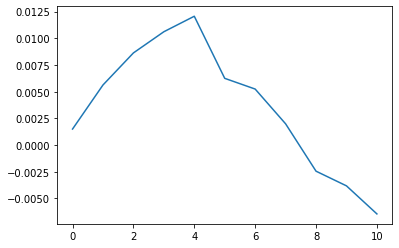

In [15]:
plt.plot(result.mean(axis=1))